In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
df1=pd.read_csv("tjk_data_processed.csv",index_col = [0])

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108882 entries, 0 to 1139073
Data columns (total 78 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   age                         1108882 non-null  int64  
 1   weight                      1108882 non-null  float64
 2   city                        1108882 non-null  object 
 3   ada                         1108882 non-null  int64  
 4   ank                         1108882 non-null  int64  
 5   bur                         1108882 non-null  int64  
 6   diy                         1108882 non-null  int64  
 7   ela                         1108882 non-null  int64  
 8   ist                         1108882 non-null  int64  
 9   izm                         1108882 non-null  int64  
 10  koc                         1108882 non-null  int64  
 11  urf                         1108882 non-null  int64  
 12  short                       1108882 non-null  int64  
 1

In [4]:
df1_elected= df1[["distance_cat","surface","gender","breed","centiseconds"]]

In [5]:
df1_elected.head(10)

,distance_cat,surface,gender,breed,centiseconds
0,short,Dirt,m,arabian,9405
1,short,Dirt,f,arabian,9617
2,short,Dirt,m,arabian,9749
3,short,Dirt,f,arabian,10049
4,middle,Dirt,m,english,10623
5,middle,Dirt,m,english,10687
6,middle,Dirt,f,english,10735
7,middle,Dirt,f,english,10747
8,middle,Dirt,m,english,11623
9,middle,Dirt,f,english,11763


In [7]:
l= [["short","middle","long"], ["Turf","Dirt"], ["f","m"],["arabian","english"]]
centiseconds_list = []
distance_list= []
surface_list=[]
gender_list=[]
breed_list= []
for i in list(itertools.product(*l)):
    df=df1_elected[(df1_elected["distance_cat"]==i[0]) & (df1_elected["surface"]==i[1]) & (df1_elected["gender"]==i[2]) & (df1_elected["breed"]==i[3])]
    mean_centiseconds = df["centiseconds"].mean()
    centiseconds_list.append(mean_centiseconds)
    distance_list.append(i[0])
    surface_list.append(i[1])
    gender_list.append(i[2])
    breed_list.append(i[3])
    print(i ,end=" -----  ")
    
    print(mean_centiseconds)

('short', 'Turf', 'f', 'arabian') -----  8698.997077390695
('short', 'Turf', 'f', 'english') -----  7937.0430850158
('short', 'Turf', 'm', 'arabian') -----  8735.644694387225
('short', 'Turf', 'm', 'english') -----  7963.199911180193
('short', 'Dirt', 'f', 'arabian') -----  9444.835857313354
('short', 'Dirt', 'f', 'english') -----  8485.91808631854
('short', 'Dirt', 'm', 'arabian') -----  9409.297342812484
('short', 'Dirt', 'm', 'english') -----  8480.515637599712
('middle', 'Turf', 'f', 'arabian') -----  12137.782279808269
('middle', 'Turf', 'f', 'english') -----  10988.07173332083
('middle', 'Turf', 'm', 'arabian') -----  12101.311546948997
('middle', 'Turf', 'm', 'english') -----  10944.903424701988
('middle', 'Dirt', 'f', 'arabian') -----  12761.762831458416
('middle', 'Dirt', 'f', 'english') -----  11340.534484873262
('middle', 'Dirt', 'm', 'arabian') -----  12688.615365239295
('middle', 'Dirt', 'm', 'english') -----  11332.939674671217
('long', 'Turf', 'f', 'arabian') -----  1509

In [64]:
my_dict ={"distance":distance_list, "surface":surface_list , "gender" :gender_list , "breed": breed_list , "centiseconds" : centiseconds_list}

In [65]:
df_plot = pd.DataFrame(my_dict)

In [66]:
df_plot

,distance,surface,gender,breed,centiseconds
0,short,Turf,f,arabian,8698.997077
1,short,Turf,f,english,7937.043085
2,short,Turf,m,arabian,8735.644694
3,short,Turf,m,english,7963.199911
4,short,Dirt,f,arabian,9444.835857
5,short,Dirt,f,english,8485.918086
6,short,Dirt,m,arabian,9409.297343
7,short,Dirt,m,english,8480.515638
8,middle,Turf,f,arabian,12137.782280
9,middle,Turf,f,english,10988.071733


In [67]:
df_plot_dummy = pd.get_dummies(df_plot, columns=['distance','breed','gender','surface'])

In [68]:
df_plot_dummy

,centiseconds,distance_long,distance_middle,distance_short,breed_arabian,breed_english,gender_f,gender_m,surface_Dirt,surface_Turf
0,8698.997077,0,0,1,1,0,1,0,0,1
1,7937.043085,0,0,1,0,1,1,0,0,1
2,8735.644694,0,0,1,1,0,0,1,0,1
3,7963.199911,0,0,1,0,1,0,1,0,1
4,9444.835857,0,0,1,1,0,1,0,1,0
5,8485.918086,0,0,1,0,1,1,0,1,0
6,9409.297343,0,0,1,1,0,0,1,1,0
7,8480.515638,0,0,1,0,1,0,1,1,0
8,12137.782280,0,1,0,1,0,1,0,0,1
9,10988.071733,0,1,0,0,1,1,0,0,1


In [69]:
corr_matrix = df_plot_dummy.corr()

In [70]:
corr_matrix['centiseconds'].sort_values(ascending=False)

centiseconds       1.000000
distance_long      0.820905
breed_arabian      0.236104
surface_Dirt       0.082659
distance_middle    0.030052
gender_m           0.003827
gender_f          -0.003827
surface_Turf      -0.082659
breed_english     -0.236104
distance_short    -0.850957
Name: centiseconds, dtype: float64

<AxesSubplot:>

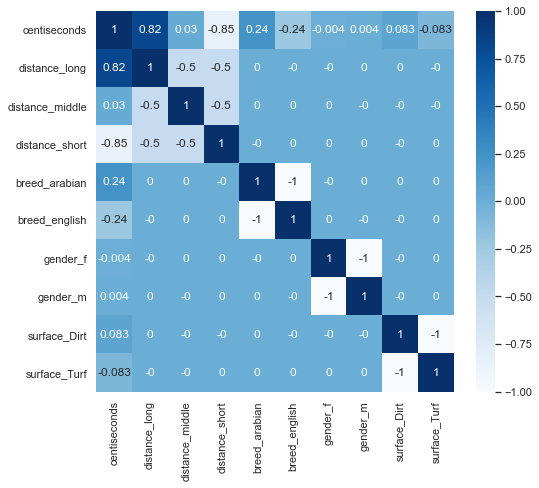

In [71]:
sns.set(rc={'figure.figsize':(8,7)})
sns.heatmap(np.round(corr_matrix,3), cmap="Blues", annot=True,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns)

In [72]:
df_plot.set_index(keys=["distance","breed","surface","gender"])

centiseconds
distance breed   surface gender              
short    arabian Turf    f        8698.997077
         english Turf    f        7937.043085
         arabian Turf    m        8735.644694
         english Turf    m        7963.199911
         arabian Dirt    f        9444.835857
         english Dirt    f        8485.918086
         arabian Dirt    m        9409.297343
         english Dirt    m        8480.515638
middle   arabian Turf    f       12137.782280
         english Turf    f       10988.071733
         arabian Turf    m       12101.311547
         english Turf    m       10944.903425
         arabian Dirt    f       12761.762831
         english Dirt    f       11340.534485
         arabian Dirt    m       12688.615365
         english Dirt    m       11332.939675
long     arabian Turf    f       15090.725788
         english Turf    f       13798.232967
         arabian Turf    m       15295.377278
         english Turf    m       13964.417737
         arabian Dirt    f       15470.490506
         english Dirt    f       13887.339467
         arabian Dirt    m       15468.881844
         english Dirt    m       13888.268111

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


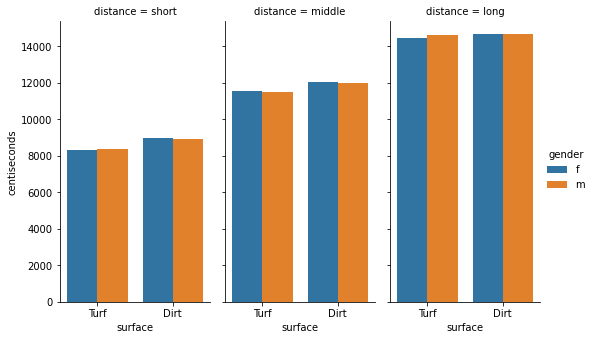

In [15]:
sns.catplot("surface", "centiseconds", col="distance", hue = "gender" , data=df_plot, kind="bar" ,aspect= 0.5 , ci=None)
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("tjk_data_plot_mean_gender.jpg" , dpi=300)

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


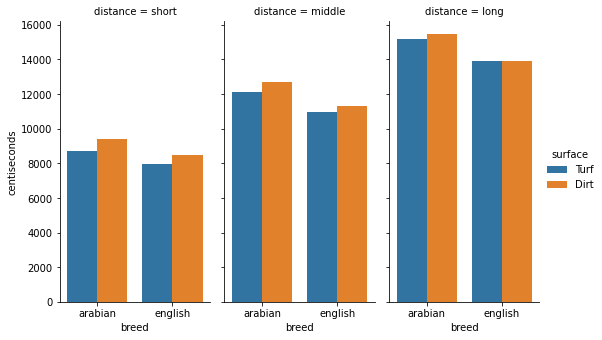

In [63]:
sns.catplot("breed", "centiseconds", col="distance", hue = "surface" , data=df_plot, kind="bar" ,aspect= 0.5 , ci=None)
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("tjk_data_plot_mean_general.jpg" , dpi=300)

In [73]:
df_elected_city = df1[["city","distance_cat","surface","gender","breed","centiseconds"]]

In [74]:
l= [['ada', 'ank', 'bur', 'diy', 'ela', 'ist', 'izm','koc', 'urf'],["short","middle","long"], ["Turf","Dirt"], ["f","m"],["arabian","english"]]
city_list = []
centiseconds_list = []
distance_list= []
surface_list=[]
gender_list=[]
breed_list= []
for i in list(itertools.product(*l)):
    df=df_elected_city[(df_elected_city["city"]==i[0]) & (df_elected_city["distance_cat"]==i[1]) & (df_elected_city["surface"]==i[2]) & (df_elected_city["gender"]==i[3]) & (df_elected_city["breed"]==i[4])]
    mean_centiseconds= df["centiseconds"].mean()
    centiseconds_list.append(mean_centiseconds)
    city_list.append(i[0])
    distance_list.append(i[1])
    surface_list.append(i[2])
    gender_list.append(i[3])
    breed_list.append(i[4])
    print(i ,end=" -----  ")
    
    print(mean_centiseconds)

('ada', 'short', 'Turf', 'f', 'arabian') -----  8765.038335911982
('ada', 'short', 'Turf', 'f', 'english') -----  7959.871258986792
('ada', 'short', 'Turf', 'm', 'arabian') -----  8764.134385829804
('ada', 'short', 'Turf', 'm', 'english') -----  7977.517166960957
('ada', 'short', 'Dirt', 'f', 'arabian') -----  9548.871222372576
('ada', 'short', 'Dirt', 'f', 'english') -----  8664.24926199262
('ada', 'short', 'Dirt', 'm', 'arabian') -----  9529.789234760052
('ada', 'short', 'Dirt', 'm', 'english') -----  8625.560551745635
('ada', 'middle', 'Turf', 'f', 'arabian') -----  13026.609577652145
('ada', 'middle', 'Turf', 'f', 'english') -----  11698.838532110092
('ada', 'middle', 'Turf', 'm', 'arabian') -----  12876.421088590298
('ada', 'middle', 'Turf', 'm', 'english') -----  11730.463907414673
('ada', 'middle', 'Dirt', 'f', 'arabian') -----  12679.365959648216
('ada', 'middle', 'Dirt', 'f', 'english') -----  11154.31492756666
('ada', 'middle', 'Dirt', 'm', 'arabian') -----  12640.21068548387

('ist', 'middle', 'Turf', 'f', 'english') -----  10765.252393199029
('ist', 'middle', 'Turf', 'm', 'arabian') -----  11862.752011902347
('ist', 'middle', 'Turf', 'm', 'english') -----  10756.144335947922
('ist', 'middle', 'Dirt', 'f', 'arabian') -----  11240.924681598595
('ist', 'middle', 'Dirt', 'f', 'english') -----  10046.2223688068
('ist', 'middle', 'Dirt', 'm', 'arabian') -----  11265.136883629191
('ist', 'middle', 'Dirt', 'm', 'english') -----  10112.385718410163
('ist', 'long', 'Turf', 'f', 'arabian') -----  15362.69590382903
('ist', 'long', 'Turf', 'f', 'english') -----  14091.581150930393
('ist', 'long', 'Turf', 'm', 'arabian') -----  15584.466731087798
('ist', 'long', 'Turf', 'm', 'english') -----  14267.823832256856
('ist', 'long', 'Dirt', 'f', 'arabian') -----  14839.986814712005
('ist', 'long', 'Dirt', 'f', 'english') -----  13423.1254858412
('ist', 'long', 'Dirt', 'm', 'arabian') -----  14958.840964343599
('ist', 'long', 'Dirt', 'm', 'english') -----  13440.399981839644
(

In [75]:
my_dict ={"city": city_list , "distance":distance_list, "surface":surface_list , "gender" :gender_list , "breed": breed_list , "centiseconds" : centiseconds_list}

In [76]:
df_city = pd.DataFrame(my_dict)

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


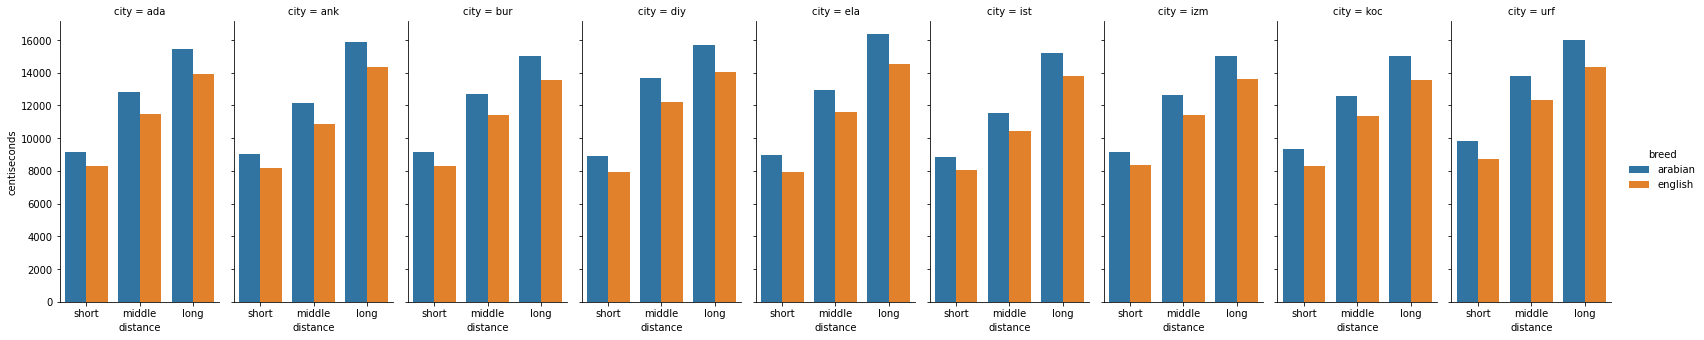

In [64]:
sns.catplot("distance", "centiseconds", col="city", hue = "breed" , data=df_city, kind="bar" ,aspect= 0.5 , ci=None)
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("tjk_data_plot_mean_city_general.jpg" , dpi=300)

In [77]:
df_only_turf = df_city[df_city["surface"]=="Turf"]

In [78]:
df_only_dirt = df_city[df_city["surface"]=="Dirt"]

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


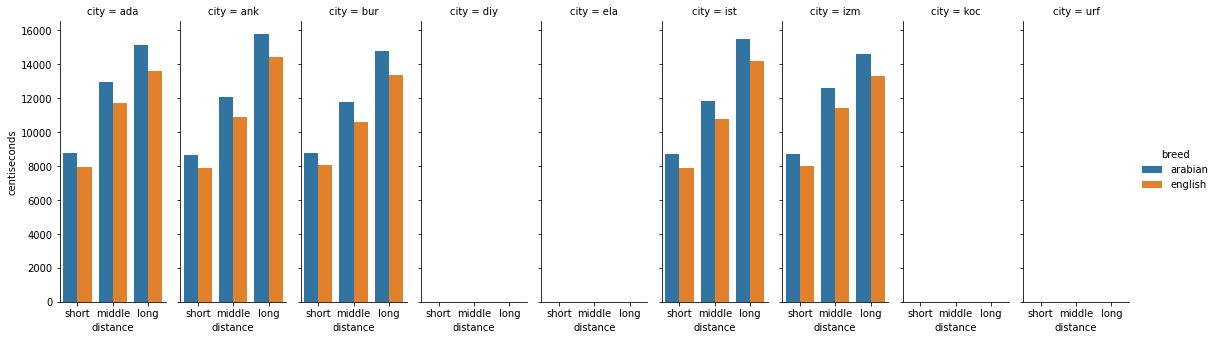

In [113]:
sns.reset_orig()
sns.catplot("distance", "centiseconds", col="city", hue = "breed" , data=df_only_turf, kind="bar" , size= 5 ,aspect= 0.35 , ci=None)
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("tjk_data_plot_turf_city2.jpg" , dpi=300)

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


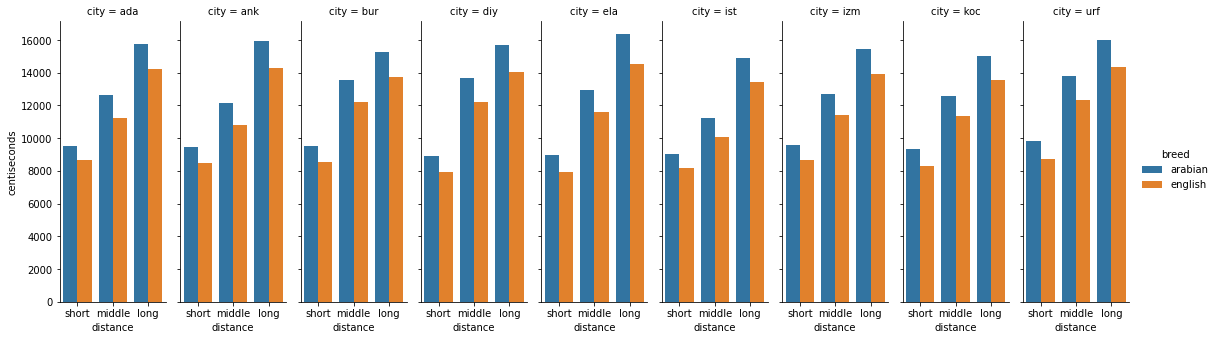

In [114]:
sns.catplot("distance", "centiseconds", col="city", hue = "breed" , data=df_only_dirt, kind="bar" , size= 5 ,aspect= 0.35 , ci=None)
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("tjk_data_plot_dirt_city.jpg" , dpi=300)

In [115]:
df_elected_weight = df1[["weight","distance_cat","surface","gender","breed","centiseconds"]]

In [116]:
weight_unique_list = df_elected_weight["weight"].unique()

In [117]:
l= [weight_unique_list,["short","middle","long"], ["Turf","Dirt"], ["f","m"],["arabian","english"]]
weight_list = []
centiseconds_list = []
distance_list= []
surface_list=[]
gender_list=[]
breed_list= []
for i in list(itertools.product(*l)):
    mask1 = np.where(df_elected_weight["weight"].values == i[0], True, False)
    mask2 = np.where(df_elected_weight[mask1]["distance_cat"].values == i[1], True, False)
    mask3 = np.where(df_elected_weight[mask1][mask2]["surface"].values == i[2], True, False)
    mask4 = np.where(df_elected_weight[mask1][mask2][mask3]["gender"].values == i[3], True, False)
    mask5 = np.where(df_elected_weight[mask1][mask2][mask3][mask4]["breed"].values == i[4], True, False)
    
    df=df_elected_weight[mask1][mask2][mask3][mask4][mask5]
    mean_centiseconds = df["centiseconds"].mean()
    centiseconds_list.append(mean_centiseconds)
    weight_list.append(i[0])
    distance_list.append(i[1])
    surface_list.append(i[2])
    gender_list.append(i[3])
    breed_list.append(i[4])
    print(i ,end=" -----  ")
    
    print(mean_centiseconds)

(58.0, 'short', 'Turf', 'f', 'arabian') -----  9151.97235333783
(58.0, 'short', 'Turf', 'f', 'english') -----  8263.891428571429
(58.0, 'short', 'Turf', 'm', 'arabian') -----  9120.855653568564
(58.0, 'short', 'Turf', 'm', 'english') -----  8225.456765999023
(58.0, 'short', 'Dirt', 'f', 'arabian') -----  9689.238198003777
(58.0, 'short', 'Dirt', 'f', 'english') -----  8582.749643705463
(58.0, 'short', 'Dirt', 'm', 'arabian') -----  9635.587752309271
(58.0, 'short', 'Dirt', 'm', 'english') -----  8595.387993908793
(58.0, 'middle', 'Turf', 'f', 'arabian') -----  11987.357814336076
(58.0, 'middle', 'Turf', 'f', 'english') -----  10844.079769736842
(58.0, 'middle', 'Turf', 'm', 'arabian') -----  12103.68715966977
(58.0, 'middle', 'Turf', 'm', 'english') -----  10938.74274457044
(58.0, 'middle', 'Dirt', 'f', 'arabian') -----  12816.238595220855
(58.0, 'middle', 'Dirt', 'f', 'english') -----  11152.54421168688
(58.0, 'middle', 'Dirt', 'm', 'arabian') -----  12617.051451811218
(58.0, 'middle'

(53.5, 'middle', 'Turf', 'f', 'english') -----  11024.588204038257
(53.5, 'middle', 'Turf', 'm', 'arabian') -----  12222.008880994672
(53.5, 'middle', 'Turf', 'm', 'english') -----  11020.068062827226
(53.5, 'middle', 'Dirt', 'f', 'arabian') -----  12755.193815987934
(53.5, 'middle', 'Dirt', 'f', 'english') -----  11525.233714285714
(53.5, 'middle', 'Dirt', 'm', 'arabian') -----  12735.142727272727
(53.5, 'middle', 'Dirt', 'm', 'english') -----  11300.29217199559
(53.5, 'long', 'Turf', 'f', 'arabian') -----  15241.78813559322
(53.5, 'long', 'Turf', 'f', 'english') -----  13813.68828828829
(53.5, 'long', 'Turf', 'm', 'arabian') -----  15147.324074074075
(53.5, 'long', 'Turf', 'm', 'english') -----  13934.866197183099
(53.5, 'long', 'Dirt', 'f', 'arabian') -----  15576.28656716418
(53.5, 'long', 'Dirt', 'f', 'english') -----  14235.388235294118
(53.5, 'long', 'Dirt', 'm', 'arabian') -----  15511.29203539823
(53.5, 'long', 'Dirt', 'm', 'english') -----  13968.049657534246
(46.0, 'short', 

(66.0, 'long', 'Dirt', 'm', 'english') -----  13637.25
(49.0, 'short', 'Turf', 'f', 'arabian') -----  8895.067632850241
(49.0, 'short', 'Turf', 'f', 'english') -----  8095.558974358974
(49.0, 'short', 'Turf', 'm', 'arabian') -----  8890.57435897436
(49.0, 'short', 'Turf', 'm', 'english') -----  8177.503105590062
(49.0, 'short', 'Dirt', 'f', 'arabian') -----  9728.183908045978
(49.0, 'short', 'Dirt', 'f', 'english') -----  8635.484848484848
(49.0, 'short', 'Dirt', 'm', 'arabian') -----  9612.541463414635
(49.0, 'short', 'Dirt', 'm', 'english') -----  8582.955390334573
(49.0, 'middle', 'Turf', 'f', 'arabian') -----  11945.181818181818
(49.0, 'middle', 'Turf', 'f', 'english') -----  11065.936416184972
(49.0, 'middle', 'Turf', 'm', 'arabian') -----  12033.038461538461
(49.0, 'middle', 'Turf', 'm', 'english') -----  10912.923809523809
(49.0, 'middle', 'Dirt', 'f', 'arabian') -----  12805.522900763359
(49.0, 'middle', 'Dirt', 'f', 'english') -----  11366.18359375
(49.0, 'middle', 'Dirt', 'm'

(59.0, 'middle', 'Dirt', 'f', 'english') -----  11240.297356828194
(59.0, 'middle', 'Dirt', 'm', 'arabian') -----  12443.864126347455
(59.0, 'middle', 'Dirt', 'm', 'english') -----  11083.91341991342
(59.0, 'long', 'Turf', 'f', 'arabian') -----  15011.292237442922
(59.0, 'long', 'Turf', 'f', 'english') -----  13759.890977443609
(59.0, 'long', 'Turf', 'm', 'arabian') -----  15374.924050632912
(59.0, 'long', 'Turf', 'm', 'english') -----  14029.774647887323
(59.0, 'long', 'Dirt', 'f', 'arabian') -----  15532.540659340659
(59.0, 'long', 'Dirt', 'f', 'english') -----  13838.904761904761
(59.0, 'long', 'Dirt', 'm', 'arabian') -----  15493.580829756795
(59.0, 'long', 'Dirt', 'm', 'english') -----  13934.393617021276
(50.0, 'short', 'Turf', 'f', 'arabian') -----  8667.723021582733
(50.0, 'short', 'Turf', 'f', 'english') -----  7920.661207778915
(50.0, 'short', 'Turf', 'm', 'arabian') -----  9014.788069073784
(50.0, 'short', 'Turf', 'm', 'english') -----  8173.846435100549
(50.0, 'short', 'Dir

(62.0, 'long', 'Dirt', 'f', 'english') -----  14080.707865168539
(62.0, 'long', 'Dirt', 'm', 'arabian') -----  15458.597222222223
(62.0, 'long', 'Dirt', 'm', 'english') -----  13812.527631578947
(52.0, 'short', 'Turf', 'f', 'arabian') -----  8708.058435127105
(52.0, 'short', 'Turf', 'f', 'english') -----  7995.366581725519
(52.0, 'short', 'Turf', 'm', 'arabian') -----  8681.054556178118
(52.0, 'short', 'Turf', 'm', 'english') -----  7997.425630252101
(52.0, 'short', 'Dirt', 'f', 'arabian') -----  9449.235572782085
(52.0, 'short', 'Dirt', 'f', 'english') -----  8530.778719162721
(52.0, 'short', 'Dirt', 'm', 'arabian') -----  9374.182042688304
(52.0, 'short', 'Dirt', 'm', 'english') -----  8498.603375527426
(52.0, 'middle', 'Turf', 'f', 'arabian') -----  12310.175272727272
(52.0, 'middle', 'Turf', 'f', 'english') -----  11137.75201072386
(52.0, 'middle', 'Turf', 'm', 'arabian') -----  12250.918904958678
(52.0, 'middle', 'Turf', 'm', 'english') -----  11034.37150710032
(52.0, 'middle', 'D

(52.5, 'middle', 'Dirt', 'm', 'arabian') -----  12719.837948717948
(52.5, 'middle', 'Dirt', 'm', 'english') -----  11420.646191646192
(52.5, 'long', 'Turf', 'f', 'arabian') -----  15029.132352941177
(52.5, 'long', 'Turf', 'f', 'english') -----  13921.678879310344
(52.5, 'long', 'Turf', 'm', 'arabian') -----  15291.371428571429
(52.5, 'long', 'Turf', 'm', 'english') -----  13926.919413919413
(52.5, 'long', 'Dirt', 'f', 'arabian') -----  15571.357638888889
(52.5, 'long', 'Dirt', 'f', 'english') -----  14114.6125
(52.5, 'long', 'Dirt', 'm', 'arabian') -----  15508.632616487455
(52.5, 'long', 'Dirt', 'm', 'english') -----  13992.429097605893
(63.0, 'short', 'Turf', 'f', 'arabian') -----  9170.103896103896
(63.0, 'short', 'Turf', 'f', 'english') -----  8107.908333333334
(63.0, 'short', 'Turf', 'm', 'arabian') -----  9076.216494845361
(63.0, 'short', 'Turf', 'm', 'english') -----  8088.248927038627
(63.0, 'short', 'Dirt', 'f', 'arabian') -----  9666.79534883721
(63.0, 'short', 'Dirt', 'f', '

(65.0, 'long', 'Dirt', 'f', 'arabian') -----  16018.666666666666
(65.0, 'long', 'Dirt', 'f', 'english') -----  14534.5
(65.0, 'long', 'Dirt', 'm', 'arabian') -----  16105.125
(65.0, 'long', 'Dirt', 'm', 'english') -----  14109.0
(47.0, 'short', 'Turf', 'f', 'arabian') -----  9008.201923076924
(47.0, 'short', 'Turf', 'f', 'english') -----  8195.568
(47.0, 'short', 'Turf', 'm', 'arabian') -----  9105.75
(47.0, 'short', 'Turf', 'm', 'english') -----  8233.72972972973
(47.0, 'short', 'Dirt', 'f', 'arabian') -----  9867.957219251337
(47.0, 'short', 'Dirt', 'f', 'english') -----  8711.403141361257
(47.0, 'short', 'Dirt', 'm', 'arabian') -----  9769.638888888889
(47.0, 'short', 'Dirt', 'm', 'english') -----  8940.013793103448
(47.0, 'middle', 'Turf', 'f', 'arabian') -----  11973.2
(47.0, 'middle', 'Turf', 'f', 'english') -----  11096.724137931034
(47.0, 'middle', 'Turf', 'm', 'arabian') -----  12160.877358490567
(47.0, 'middle', 'Turf', 'm', 'english') -----  11074.290598290598
(47.0, 'middle

(61.5, 'middle', 'Dirt', 'm', 'arabian') -----  12650.513574660634
(61.5, 'middle', 'Dirt', 'm', 'english') -----  11395.50099009901
(61.5, 'long', 'Turf', 'f', 'arabian') -----  15074.59090909091
(61.5, 'long', 'Turf', 'f', 'english') -----  14032.849315068494
(61.5, 'long', 'Turf', 'm', 'arabian') -----  15316.777777777777
(61.5, 'long', 'Turf', 'm', 'english') -----  13995.23595505618
(61.5, 'long', 'Dirt', 'f', 'arabian') -----  15616.823529411764
(61.5, 'long', 'Dirt', 'f', 'english') -----  13937.137614678899
(61.5, 'long', 'Dirt', 'm', 'arabian') -----  15539.61475409836
(61.5, 'long', 'Dirt', 'm', 'english') -----  13921.668918918918
(59.5, 'short', 'Turf', 'f', 'arabian') -----  9204.073569482289
(59.5, 'short', 'Turf', 'f', 'english') -----  8245.157232704403
(59.5, 'short', 'Turf', 'm', 'arabian') -----  9441.03538743136
(59.5, 'short', 'Turf', 'm', 'english') -----  8195.219827586207
(59.5, 'short', 'Dirt', 'f', 'arabian') -----  9642.989180834622
(59.5, 'short', 'Dirt', 'f

(43.0, 'short', 'Turf', 'm', 'arabian') -----  nan
(43.0, 'short', 'Turf', 'm', 'english') -----  8474.0
(43.0, 'short', 'Dirt', 'f', 'arabian') -----  9286.666666666666
(43.0, 'short', 'Dirt', 'f', 'english') -----  7803.0
(43.0, 'short', 'Dirt', 'm', 'arabian') -----  10792.5
(43.0, 'short', 'Dirt', 'm', 'english') -----  9687.25
(43.0, 'middle', 'Turf', 'f', 'arabian') -----  nan
(43.0, 'middle', 'Turf', 'f', 'english') -----  10629.0
(43.0, 'middle', 'Turf', 'm', 'arabian') -----  12549.0
(43.0, 'middle', 'Turf', 'm', 'english') -----  nan
(43.0, 'middle', 'Dirt', 'f', 'arabian') -----  14004.5
(43.0, 'middle', 'Dirt', 'f', 'english') -----  11086.0
(43.0, 'middle', 'Dirt', 'm', 'arabian') -----  13078.4
(43.0, 'middle', 'Dirt', 'm', 'english') -----  12844.0
(43.0, 'long', 'Turf', 'f', 'arabian') -----  nan
(43.0, 'long', 'Turf', 'f', 'english') -----  nan
(43.0, 'long', 'Turf', 'm', 'arabian') -----  nan
(43.0, 'long', 'Turf', 'm', 'english') -----  12840.0
(43.0, 'long', 'Dirt',

(69.0, 'long', 'Dirt', 'f', 'arabian') -----  nan
(69.0, 'long', 'Dirt', 'f', 'english') -----  nan
(69.0, 'long', 'Dirt', 'm', 'arabian') -----  15985.0
(69.0, 'long', 'Dirt', 'm', 'english') -----  13934.0
(43.5, 'short', 'Turf', 'f', 'arabian') -----  6183.0
(43.5, 'short', 'Turf', 'f', 'english') -----  nan
(43.5, 'short', 'Turf', 'm', 'arabian') -----  8928.0
(43.5, 'short', 'Turf', 'm', 'english') -----  nan
(43.5, 'short', 'Dirt', 'f', 'arabian') -----  10510.0
(43.5, 'short', 'Dirt', 'f', 'english') -----  nan
(43.5, 'short', 'Dirt', 'm', 'arabian') -----  10708.0
(43.5, 'short', 'Dirt', 'm', 'english') -----  9391.0
(43.5, 'middle', 'Turf', 'f', 'arabian') -----  11108.0
(43.5, 'middle', 'Turf', 'f', 'english') -----  nan
(43.5, 'middle', 'Turf', 'm', 'arabian') -----  12439.5
(43.5, 'middle', 'Turf', 'm', 'english') -----  nan
(43.5, 'middle', 'Dirt', 'f', 'arabian') -----  14849.5
(43.5, 'middle', 'Dirt', 'f', 'english') -----  11515.333333333334
(43.5, 'middle', 'Dirt', 'm'

(40.0, 'middle', 'Dirt', 'm', 'arabian') -----  14779.0
(40.0, 'middle', 'Dirt', 'm', 'english') -----  nan
(40.0, 'long', 'Turf', 'f', 'arabian') -----  nan
(40.0, 'long', 'Turf', 'f', 'english') -----  nan
(40.0, 'long', 'Turf', 'm', 'arabian') -----  nan
(40.0, 'long', 'Turf', 'm', 'english') -----  nan
(40.0, 'long', 'Dirt', 'f', 'arabian') -----  nan
(40.0, 'long', 'Dirt', 'f', 'english') -----  15331.0
(40.0, 'long', 'Dirt', 'm', 'arabian') -----  16446.0
(40.0, 'long', 'Dirt', 'm', 'english') -----  nan
(69.5, 'short', 'Turf', 'f', 'arabian') -----  nan
(69.5, 'short', 'Turf', 'f', 'english') -----  nan
(69.5, 'short', 'Turf', 'm', 'arabian') -----  nan
(69.5, 'short', 'Turf', 'm', 'english') -----  nan
(69.5, 'short', 'Dirt', 'f', 'arabian') -----  nan
(69.5, 'short', 'Dirt', 'f', 'english') -----  nan
(69.5, 'short', 'Dirt', 'm', 'arabian') -----  nan
(69.5, 'short', 'Dirt', 'm', 'english') -----  nan
(69.5, 'middle', 'Turf', 'f', 'arabian') -----  nan
(69.5, 'middle', 'Turf',

(54.3, 'short', 'Turf', 'm', 'arabian') -----  8695.73949579832
(54.3, 'short', 'Turf', 'm', 'english') -----  7934.258064516129
(54.3, 'short', 'Dirt', 'f', 'arabian') -----  9419.51923076923
(54.3, 'short', 'Dirt', 'f', 'english') -----  8422.906077348067
(54.3, 'short', 'Dirt', 'm', 'arabian') -----  9350.423076923076
(54.3, 'short', 'Dirt', 'm', 'english') -----  8464.513392857143
(54.3, 'middle', 'Turf', 'f', 'arabian') -----  11986.255813953489
(54.3, 'middle', 'Turf', 'f', 'english') -----  11019.746031746032
(54.3, 'middle', 'Turf', 'm', 'arabian') -----  12554.173076923076
(54.3, 'middle', 'Turf', 'm', 'english') -----  11039.494949494949
(54.3, 'middle', 'Dirt', 'f', 'arabian') -----  12571.0
(54.3, 'middle', 'Dirt', 'f', 'english') -----  11353.43795620438
(54.3, 'middle', 'Dirt', 'm', 'arabian') -----  12627.280701754386
(54.3, 'middle', 'Dirt', 'm', 'english') -----  11326.771241830065
(54.3, 'long', 'Turf', 'f', 'arabian') -----  14568.454545454546
(54.3, 'long', 'Turf', 

(50.9, 'middle', 'Dirt', 'f', 'arabian') -----  12368.310344827587
(50.9, 'middle', 'Dirt', 'f', 'english') -----  11239.82142857143
(50.9, 'middle', 'Dirt', 'm', 'arabian') -----  13179.825
(50.9, 'middle', 'Dirt', 'm', 'english') -----  11495.642857142857
(50.9, 'long', 'Turf', 'f', 'arabian') -----  15623.0
(50.9, 'long', 'Turf', 'f', 'english') -----  13188.666666666666
(50.9, 'long', 'Turf', 'm', 'arabian') -----  15597.4375
(50.9, 'long', 'Turf', 'm', 'english') -----  13561.227272727272
(50.9, 'long', 'Dirt', 'f', 'arabian') -----  14926.5
(50.9, 'long', 'Dirt', 'f', 'english') -----  13894.7
(50.9, 'long', 'Dirt', 'm', 'arabian') -----  15268.625
(50.9, 'long', 'Dirt', 'm', 'english') -----  13644.5
(58.2, 'short', 'Turf', 'f', 'arabian') -----  8773.666666666666
(58.2, 'short', 'Turf', 'f', 'english') -----  8279.855555555556
(58.2, 'short', 'Turf', 'm', 'arabian') -----  8873.542857142857
(58.2, 'short', 'Turf', 'm', 'english') -----  8169.275280898876
(58.2, 'short', 'Dirt',

(54.4, 'short', 'Turf', 'f', 'arabian') -----  8839.063492063493
(54.4, 'short', 'Turf', 'f', 'english') -----  8078.944444444444
(54.4, 'short', 'Turf', 'm', 'arabian') -----  8782.463157894737
(54.4, 'short', 'Turf', 'm', 'english') -----  7920.434210526316
(54.4, 'short', 'Dirt', 'f', 'arabian') -----  9551.728
(54.4, 'short', 'Dirt', 'f', 'english') -----  8420.281690140846
(54.4, 'short', 'Dirt', 'm', 'arabian') -----  9169.6
(54.4, 'short', 'Dirt', 'm', 'english') -----  8391.754966887418
(54.4, 'middle', 'Turf', 'f', 'arabian') -----  12316.939393939394
(54.4, 'middle', 'Turf', 'f', 'english') -----  11036.561643835616
(54.4, 'middle', 'Turf', 'm', 'arabian') -----  12235.717391304348
(54.4, 'middle', 'Turf', 'm', 'english') -----  10818.298507462687
(54.4, 'middle', 'Dirt', 'f', 'arabian') -----  12741.692307692309
(54.4, 'middle', 'Dirt', 'f', 'english') -----  11071.041237113403
(54.4, 'middle', 'Dirt', 'm', 'arabian') -----  12711.333333333334
(54.4, 'middle', 'Dirt', 'm', '

(49.3, 'long', 'Turf', 'm', 'english') -----  12668.0
(49.3, 'long', 'Dirt', 'f', 'arabian') -----  nan
(49.3, 'long', 'Dirt', 'f', 'english') -----  13540.5
(49.3, 'long', 'Dirt', 'm', 'arabian') -----  14456.0
(49.3, 'long', 'Dirt', 'm', 'english') -----  14555.8
(49.2, 'short', 'Turf', 'f', 'arabian') -----  9014.5
(49.2, 'short', 'Turf', 'f', 'english') -----  8196.666666666666
(49.2, 'short', 'Turf', 'm', 'arabian') -----  9570.0
(49.2, 'short', 'Turf', 'm', 'english') -----  8055.857142857143
(49.2, 'short', 'Dirt', 'f', 'arabian') -----  8783.0
(49.2, 'short', 'Dirt', 'f', 'english') -----  8212.0
(49.2, 'short', 'Dirt', 'm', 'arabian') -----  9550.333333333334
(49.2, 'short', 'Dirt', 'm', 'english') -----  10460.0
(49.2, 'middle', 'Turf', 'f', 'arabian') -----  11238.25
(49.2, 'middle', 'Turf', 'f', 'english') -----  11063.166666666666
(49.2, 'middle', 'Turf', 'm', 'arabian') -----  12624.5
(49.2, 'middle', 'Turf', 'm', 'english') -----  11020.545454545454
(49.2, 'middle', 'Dir

(53.3, 'middle', 'Turf', 'f', 'arabian') -----  12329.19512195122
(53.3, 'middle', 'Turf', 'f', 'english') -----  11014.507462686568
(53.3, 'middle', 'Turf', 'm', 'arabian') -----  12086.529411764706
(53.3, 'middle', 'Turf', 'm', 'english') -----  11301.6
(53.3, 'middle', 'Dirt', 'f', 'arabian') -----  12622.855072463768
(53.3, 'middle', 'Dirt', 'f', 'english') -----  11684.125
(53.3, 'middle', 'Dirt', 'm', 'arabian') -----  12544.69696969697
(53.3, 'middle', 'Dirt', 'm', 'english') -----  11074.15873015873
(53.3, 'long', 'Turf', 'f', 'arabian') -----  14774.142857142857
(53.3, 'long', 'Turf', 'f', 'english') -----  13934.1
(53.3, 'long', 'Turf', 'm', 'arabian') -----  15029.384615384615
(53.3, 'long', 'Turf', 'm', 'english') -----  14139.25
(53.3, 'long', 'Dirt', 'f', 'arabian') -----  15660.0
(53.3, 'long', 'Dirt', 'f', 'english') -----  13548.23076923077
(53.3, 'long', 'Dirt', 'm', 'arabian') -----  15479.565217391304
(53.3, 'long', 'Dirt', 'm', 'english') -----  13703.78947368421
(

(55.4, 'long', 'Dirt', 'm', 'arabian') -----  15252.333333333334
(55.4, 'long', 'Dirt', 'm', 'english') -----  13586.021978021978
(60.2, 'short', 'Turf', 'f', 'arabian') -----  9378.5
(60.2, 'short', 'Turf', 'f', 'english') -----  8420.5
(60.2, 'short', 'Turf', 'm', 'arabian') -----  9305.857142857143
(60.2, 'short', 'Turf', 'm', 'english') -----  8150.083333333333
(60.2, 'short', 'Dirt', 'f', 'arabian') -----  10289.0
(60.2, 'short', 'Dirt', 'f', 'english') -----  8458.307692307691
(60.2, 'short', 'Dirt', 'm', 'arabian') -----  9521.947368421053
(60.2, 'short', 'Dirt', 'm', 'english') -----  8357.139534883721
(60.2, 'middle', 'Turf', 'f', 'arabian') -----  12300.2
(60.2, 'middle', 'Turf', 'f', 'english') -----  10890.2
(60.2, 'middle', 'Turf', 'm', 'arabian') -----  12314.272727272728
(60.2, 'middle', 'Turf', 'm', 'english') -----  10467.818181818182
(60.2, 'middle', 'Dirt', 'f', 'arabian') -----  13749.272727272728
(60.2, 'middle', 'Dirt', 'f', 'english') -----  11207.5
(60.2, 'middl

(52.8, 'middle', 'Turf', 'f', 'english') -----  11006.2
(52.8, 'middle', 'Turf', 'm', 'arabian') -----  12279.781818181818
(52.8, 'middle', 'Turf', 'm', 'english') -----  10924.803921568628
(52.8, 'middle', 'Dirt', 'f', 'arabian') -----  12682.450980392157
(52.8, 'middle', 'Dirt', 'f', 'english') -----  10996.671641791045
(52.8, 'middle', 'Dirt', 'm', 'arabian') -----  12865.70588235294
(52.8, 'middle', 'Dirt', 'm', 'english') -----  11349.426966292134
(52.8, 'long', 'Turf', 'f', 'arabian') -----  14751.92857142857
(52.8, 'long', 'Turf', 'f', 'english') -----  13964.5
(52.8, 'long', 'Turf', 'm', 'arabian') -----  15537.925925925925
(52.8, 'long', 'Turf', 'm', 'english') -----  13555.333333333334
(52.8, 'long', 'Dirt', 'f', 'arabian') -----  15581.84
(52.8, 'long', 'Dirt', 'f', 'english') -----  13654.416666666666
(52.8, 'long', 'Dirt', 'm', 'arabian') -----  15266.49090909091
(52.8, 'long', 'Dirt', 'm', 'english') -----  13704.820512820514
(50.2, 'short', 'Turf', 'f', 'arabian') ----- 

(56.2, 'short', 'Turf', 'f', 'english') -----  7780.3253588516745
(56.2, 'short', 'Turf', 'm', 'arabian') -----  8429.9243697479
(56.2, 'short', 'Turf', 'm', 'english') -----  7753.892753623189
(56.2, 'short', 'Dirt', 'f', 'arabian') -----  9148.97679814385
(56.2, 'short', 'Dirt', 'f', 'english') -----  8377.09881422925
(56.2, 'short', 'Dirt', 'm', 'arabian') -----  9272.46974522293
(56.2, 'short', 'Dirt', 'm', 'english') -----  8314.61616161616
(56.2, 'middle', 'Turf', 'f', 'arabian') -----  12212.0125
(56.2, 'middle', 'Turf', 'f', 'english') -----  11061.317991631799
(56.2, 'middle', 'Turf', 'm', 'arabian') -----  11961.28729281768
(56.2, 'middle', 'Turf', 'm', 'english') -----  10879.511764705883
(56.2, 'middle', 'Dirt', 'f', 'arabian') -----  12714.640845070422
(56.2, 'middle', 'Dirt', 'f', 'english') -----  11347.648745519713
(56.2, 'middle', 'Dirt', 'm', 'arabian') -----  12663.04
(56.2, 'middle', 'Dirt', 'm', 'english') -----  11249.939890710382
(56.2, 'long', 'Turf', 'f', 'arab

(57.1, 'middle', 'Dirt', 'm', 'english') -----  11307.719457013574
(57.1, 'long', 'Turf', 'f', 'arabian') -----  15086.944444444445
(57.1, 'long', 'Turf', 'f', 'english') -----  13521.851851851852
(57.1, 'long', 'Turf', 'm', 'arabian') -----  15051.228571428572
(57.1, 'long', 'Turf', 'm', 'english') -----  13200.611111111111
(57.1, 'long', 'Dirt', 'f', 'arabian') -----  14946.809523809523
(57.1, 'long', 'Dirt', 'f', 'english') -----  13876.333333333334
(57.1, 'long', 'Dirt', 'm', 'arabian') -----  15494.104166666666
(57.1, 'long', 'Dirt', 'm', 'english') -----  13720.333333333334
(58.4, 'short', 'Turf', 'f', 'arabian') -----  9008.357142857143
(58.4, 'short', 'Turf', 'f', 'english') -----  8217.5
(58.4, 'short', 'Turf', 'm', 'arabian') -----  8687.153846153846
(58.4, 'short', 'Turf', 'm', 'english') -----  8320.131578947368
(58.4, 'short', 'Dirt', 'f', 'arabian') -----  9625.135135135135
(58.4, 'short', 'Dirt', 'f', 'english') -----  8483.694444444445
(58.4, 'short', 'Dirt', 'm', 'arab

(56.9, 'short', 'Turf', 'm', 'arabian') -----  8495.954022988506
(56.9, 'short', 'Turf', 'm', 'english') -----  7963.966666666666
(56.9, 'short', 'Dirt', 'f', 'arabian') -----  9230.303278688525
(56.9, 'short', 'Dirt', 'f', 'english') -----  8463.628378378378
(56.9, 'short', 'Dirt', 'm', 'arabian') -----  9167.826446280991
(56.9, 'short', 'Dirt', 'm', 'english') -----  8307.410714285714
(56.9, 'middle', 'Turf', 'f', 'arabian') -----  12312.257142857143
(56.9, 'middle', 'Turf', 'f', 'english') -----  10716.762711864407
(56.9, 'middle', 'Turf', 'm', 'arabian') -----  11989.5
(56.9, 'middle', 'Turf', 'm', 'english') -----  11076.277777777777
(56.9, 'middle', 'Dirt', 'f', 'arabian') -----  12377.962264150943
(56.9, 'middle', 'Dirt', 'f', 'english') -----  11570.101449275362
(56.9, 'middle', 'Dirt', 'm', 'arabian') -----  12753.584415584415
(56.9, 'middle', 'Dirt', 'm', 'english') -----  11086.819277108434
(56.9, 'long', 'Turf', 'f', 'arabian') -----  14655.125
(56.9, 'long', 'Turf', 'f', '

(53.2, 'short', 'Turf', 'f', 'arabian') -----  8741.187050359713
(53.2, 'short', 'Turf', 'f', 'english') -----  7902.039473684211
(53.2, 'short', 'Turf', 'm', 'arabian') -----  8618.765306122448
(53.2, 'short', 'Turf', 'm', 'english') -----  7811.134146341464
(53.2, 'short', 'Dirt', 'f', 'arabian') -----  9407.156069364162
(53.2, 'short', 'Dirt', 'f', 'english') -----  8447.45390070922
(53.2, 'short', 'Dirt', 'm', 'arabian') -----  9326.81875
(53.2, 'short', 'Dirt', 'm', 'english') -----  8349.283333333333
(53.2, 'middle', 'Turf', 'f', 'arabian') -----  12222.659574468085
(53.2, 'middle', 'Turf', 'f', 'english') -----  11024.151898734177
(53.2, 'middle', 'Turf', 'm', 'arabian') -----  11863.5
(53.2, 'middle', 'Turf', 'm', 'english') -----  10876.531914893618
(53.2, 'middle', 'Dirt', 'f', 'arabian') -----  12886.621212121212
(53.2, 'middle', 'Dirt', 'f', 'english') -----  11465.578431372549
(53.2, 'middle', 'Dirt', 'm', 'arabian') -----  12703.985714285714
(53.2, 'middle', 'Dirt', 'm', 

(52.7, 'short', 'Turf', 'm', 'english') -----  8126.595744680851
(52.7, 'short', 'Dirt', 'f', 'arabian') -----  9397.53781512605
(52.7, 'short', 'Dirt', 'f', 'english') -----  8388.204081632653
(52.7, 'short', 'Dirt', 'm', 'arabian') -----  9367.404761904761
(52.7, 'short', 'Dirt', 'm', 'english') -----  8376.025974025973
(52.7, 'middle', 'Turf', 'f', 'arabian') -----  12305.557692307691
(52.7, 'middle', 'Turf', 'f', 'english') -----  11147.78125
(52.7, 'middle', 'Turf', 'm', 'arabian') -----  12075.466666666667
(52.7, 'middle', 'Turf', 'm', 'english') -----  10899.458333333334
(52.7, 'middle', 'Dirt', 'f', 'arabian') -----  12369.857142857143
(52.7, 'middle', 'Dirt', 'f', 'english') -----  11122.341176470589
(52.7, 'middle', 'Dirt', 'm', 'arabian') -----  12513.086206896553
(52.7, 'middle', 'Dirt', 'm', 'english') -----  11371.148148148148
(52.7, 'long', 'Turf', 'f', 'arabian') -----  16074.666666666666
(52.7, 'long', 'Turf', 'f', 'english') -----  13847.53125
(52.7, 'long', 'Turf', '

(51.8, 'short', 'Dirt', 'f', 'arabian') -----  9605.094117647059
(51.8, 'short', 'Dirt', 'f', 'english') -----  8503.008438818566
(51.8, 'short', 'Dirt', 'm', 'arabian') -----  9541.666666666666
(51.8, 'short', 'Dirt', 'm', 'english') -----  8519.572093023256
(51.8, 'middle', 'Turf', 'f', 'arabian') -----  12409.827160493827
(51.8, 'middle', 'Turf', 'f', 'english') -----  11200.910344827586
(51.8, 'middle', 'Turf', 'm', 'arabian') -----  12316.339449541285
(51.8, 'middle', 'Turf', 'm', 'english') -----  11100.084033613446
(51.8, 'middle', 'Dirt', 'f', 'arabian') -----  13072.65811965812
(51.8, 'middle', 'Dirt', 'f', 'english') -----  11393.398876404495
(51.8, 'middle', 'Dirt', 'm', 'arabian') -----  12848.647368421052
(51.8, 'middle', 'Dirt', 'm', 'english') -----  11421.232876712329
(51.8, 'long', 'Turf', 'f', 'arabian') -----  15260.0
(51.8, 'long', 'Turf', 'f', 'english') -----  13475.326086956522
(51.8, 'long', 'Turf', 'm', 'arabian') -----  15384.617021276596
(51.8, 'long', 'Turf'

(50.8, 'short', 'Dirt', 'm', 'english') -----  8382.521739130434
(50.8, 'middle', 'Turf', 'f', 'arabian') -----  12235.363636363636
(50.8, 'middle', 'Turf', 'f', 'english') -----  11025.055555555555
(50.8, 'middle', 'Turf', 'm', 'arabian') -----  12231.806451612903
(50.8, 'middle', 'Turf', 'm', 'english') -----  11194.666666666666
(50.8, 'middle', 'Dirt', 'f', 'arabian') -----  13416.25925925926
(50.8, 'middle', 'Dirt', 'f', 'english') -----  11672.585365853658
(50.8, 'middle', 'Dirt', 'm', 'arabian') -----  13286.0
(50.8, 'middle', 'Dirt', 'm', 'english') -----  11453.746268656716
(50.8, 'long', 'Turf', 'f', 'arabian') -----  14536.166666666666
(50.8, 'long', 'Turf', 'f', 'english') -----  13893.875
(50.8, 'long', 'Turf', 'm', 'arabian') -----  15919.923076923076
(50.8, 'long', 'Turf', 'm', 'english') -----  14639.333333333334
(50.8, 'long', 'Dirt', 'f', 'arabian') -----  15281.57142857143
(50.8, 'long', 'Dirt', 'f', 'english') -----  13804.21052631579
(50.8, 'long', 'Dirt', 'm', 'ara

(53.8, 'long', 'Turf', 'm', 'english') -----  13297.5
(53.8, 'long', 'Dirt', 'f', 'arabian') -----  15248.368421052632
(53.8, 'long', 'Dirt', 'f', 'english') -----  13739.977777777778
(53.8, 'long', 'Dirt', 'm', 'arabian') -----  15319.441860465116
(53.8, 'long', 'Dirt', 'm', 'english') -----  13797.217391304348
(47.3, 'short', 'Turf', 'f', 'arabian') -----  10175.0
(47.3, 'short', 'Turf', 'f', 'english') -----  7308.0
(47.3, 'short', 'Turf', 'm', 'arabian') -----  nan
(47.3, 'short', 'Turf', 'm', 'english') -----  nan
(47.3, 'short', 'Dirt', 'f', 'arabian') -----  nan
(47.3, 'short', 'Dirt', 'f', 'english') -----  8378.0
(47.3, 'short', 'Dirt', 'm', 'arabian') -----  9617.0
(47.3, 'short', 'Dirt', 'm', 'english') -----  7444.0
(47.3, 'middle', 'Turf', 'f', 'arabian') -----  11972.5
(47.3, 'middle', 'Turf', 'f', 'english') -----  nan
(47.3, 'middle', 'Turf', 'm', 'arabian') -----  13263.0
(47.3, 'middle', 'Turf', 'm', 'english') -----  nan
(47.3, 'middle', 'Dirt', 'f', 'arabian') -----

(57.9, 'short', 'Turf', 'f', 'english') -----  7947.64
(57.9, 'short', 'Turf', 'm', 'arabian') -----  8443.560975609756
(57.9, 'short', 'Turf', 'm', 'english') -----  7831.16
(57.9, 'short', 'Dirt', 'f', 'arabian') -----  9386.127659574468
(57.9, 'short', 'Dirt', 'f', 'english') -----  8300.044444444444
(57.9, 'short', 'Dirt', 'm', 'arabian') -----  9374.242718446601
(57.9, 'short', 'Dirt', 'm', 'english') -----  8581.015873015873
(57.9, 'middle', 'Turf', 'f', 'arabian') -----  11170.0
(57.9, 'middle', 'Turf', 'f', 'english') -----  11036.5
(57.9, 'middle', 'Turf', 'm', 'arabian') -----  11704.6875
(57.9, 'middle', 'Turf', 'm', 'english') -----  11496.75
(57.9, 'middle', 'Dirt', 'f', 'arabian') -----  13360.714285714286
(57.9, 'middle', 'Dirt', 'f', 'english') -----  11807.55
(57.9, 'middle', 'Dirt', 'm', 'arabian') -----  13067.45652173913
(57.9, 'middle', 'Dirt', 'm', 'english') -----  11594.135135135135
(57.9, 'long', 'Turf', 'f', 'arabian') -----  14159.0
(57.9, 'long', 'Turf', 'f'

(49.1, 'middle', 'Turf', 'm', 'arabian') -----  10916.0
(49.1, 'middle', 'Turf', 'm', 'english') -----  9699.0
(49.1, 'middle', 'Dirt', 'f', 'arabian') -----  12326.0
(49.1, 'middle', 'Dirt', 'f', 'english') -----  9336.0
(49.1, 'middle', 'Dirt', 'm', 'arabian') -----  15292.0
(49.1, 'middle', 'Dirt', 'm', 'english') -----  12824.0
(49.1, 'long', 'Turf', 'f', 'arabian') -----  16105.0
(49.1, 'long', 'Turf', 'f', 'english') -----  13357.0
(49.1, 'long', 'Turf', 'm', 'arabian') -----  17064.0
(49.1, 'long', 'Turf', 'm', 'english') -----  18972.0
(49.1, 'long', 'Dirt', 'f', 'arabian') -----  nan
(49.1, 'long', 'Dirt', 'f', 'english') -----  14154.5
(49.1, 'long', 'Dirt', 'm', 'arabian') -----  16089.5
(49.1, 'long', 'Dirt', 'm', 'english') -----  13779.0
(51.4, 'short', 'Turf', 'f', 'arabian') -----  8768.31914893617
(51.4, 'short', 'Turf', 'f', 'english') -----  7735.770491803279
(51.4, 'short', 'Turf', 'm', 'arabian') -----  9147.825
(51.4, 'short', 'Turf', 'm', 'english') -----  8099.1

(70.1, 'long', 'Dirt', 'f', 'english') -----  nan
(70.1, 'long', 'Dirt', 'm', 'arabian') -----  nan
(70.1, 'long', 'Dirt', 'm', 'english') -----  nan
(50.4, 'short', 'Turf', 'f', 'arabian') -----  8914.4
(50.4, 'short', 'Turf', 'f', 'english') -----  8133.645161290323
(50.4, 'short', 'Turf', 'm', 'arabian') -----  8868.454545454546
(50.4, 'short', 'Turf', 'm', 'english') -----  8358.894736842105
(50.4, 'short', 'Dirt', 'f', 'arabian') -----  9831.09677419355
(50.4, 'short', 'Dirt', 'f', 'english') -----  8763.333333333334
(50.4, 'short', 'Dirt', 'm', 'arabian') -----  9655.27027027027
(50.4, 'short', 'Dirt', 'm', 'english') -----  8667.128205128205
(50.4, 'middle', 'Turf', 'f', 'arabian') -----  11701.75
(50.4, 'middle', 'Turf', 'f', 'english') -----  11208.684210526315
(50.4, 'middle', 'Turf', 'm', 'arabian') -----  12094.0
(50.4, 'middle', 'Turf', 'm', 'english') -----  10918.25
(50.4, 'middle', 'Dirt', 'f', 'arabian') -----  13433.333333333334
(50.4, 'middle', 'Dirt', 'f', 'english'

(54.9, 'middle', 'Dirt', 'm', 'english') -----  11485.024390243903
(54.9, 'long', 'Turf', 'f', 'arabian') -----  14455.0
(54.9, 'long', 'Turf', 'f', 'english') -----  13548.777777777777
(54.9, 'long', 'Turf', 'm', 'arabian') -----  15374.866666666667
(54.9, 'long', 'Turf', 'm', 'english') -----  13561.333333333334
(54.9, 'long', 'Dirt', 'f', 'arabian') -----  15537.4
(54.9, 'long', 'Dirt', 'f', 'english') -----  13524.464285714286
(54.9, 'long', 'Dirt', 'm', 'arabian') -----  15386.30303030303
(54.9, 'long', 'Dirt', 'm', 'english') -----  13400.772727272728
(48.9, 'short', 'Turf', 'f', 'arabian') -----  9343.0
(48.9, 'short', 'Turf', 'f', 'english') -----  8094.333333333333
(48.9, 'short', 'Turf', 'm', 'arabian') -----  nan
(48.9, 'short', 'Turf', 'm', 'english') -----  8382.0
(48.9, 'short', 'Dirt', 'f', 'arabian') -----  8889.5
(48.9, 'short', 'Dirt', 'f', 'english') -----  nan
(48.9, 'short', 'Dirt', 'm', 'arabian') -----  8521.0
(48.9, 'short', 'Dirt', 'm', 'english') -----  8575.0

(46.3, 'middle', 'Dirt', 'f', 'english') -----  12519.0
(46.3, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(46.3, 'middle', 'Dirt', 'm', 'english') -----  nan
(46.3, 'long', 'Turf', 'f', 'arabian') -----  nan
(46.3, 'long', 'Turf', 'f', 'english') -----  nan
(46.3, 'long', 'Turf', 'm', 'arabian') -----  nan
(46.3, 'long', 'Turf', 'm', 'english') -----  nan
(46.3, 'long', 'Dirt', 'f', 'arabian') -----  nan
(46.3, 'long', 'Dirt', 'f', 'english') -----  nan
(46.3, 'long', 'Dirt', 'm', 'arabian') -----  16185.0
(46.3, 'long', 'Dirt', 'm', 'english') -----  nan
(63.8, 'short', 'Turf', 'f', 'arabian') -----  nan
(63.8, 'short', 'Turf', 'f', 'english') -----  nan
(63.8, 'short', 'Turf', 'm', 'arabian') -----  nan
(63.8, 'short', 'Turf', 'm', 'english') -----  nan
(63.8, 'short', 'Dirt', 'f', 'arabian') -----  nan
(63.8, 'short', 'Dirt', 'f', 'english') -----  8598.0
(63.8, 'short', 'Dirt', 'm', 'arabian') -----  nan
(63.8, 'short', 'Dirt', 'm', 'english') -----  nan
(63.8, 'middle', 'Turf', 

(60.7, 'middle', 'Turf', 'm', 'english') -----  11391.0
(60.7, 'middle', 'Dirt', 'f', 'arabian') -----  14012.25
(60.7, 'middle', 'Dirt', 'f', 'english') -----  10303.0
(60.7, 'middle', 'Dirt', 'm', 'arabian') -----  13484.0
(60.7, 'middle', 'Dirt', 'm', 'english') -----  11896.25
(60.7, 'long', 'Turf', 'f', 'arabian') -----  15571.0
(60.7, 'long', 'Turf', 'f', 'english') -----  nan
(60.7, 'long', 'Turf', 'm', 'arabian') -----  15195.0
(60.7, 'long', 'Turf', 'm', 'english') -----  nan
(60.7, 'long', 'Dirt', 'f', 'arabian') -----  nan
(60.7, 'long', 'Dirt', 'f', 'english') -----  13572.0
(60.7, 'long', 'Dirt', 'm', 'arabian') -----  14878.666666666666
(60.7, 'long', 'Dirt', 'm', 'english') -----  13520.0
(44.6, 'short', 'Turf', 'f', 'arabian') -----  nan
(44.6, 'short', 'Turf', 'f', 'english') -----  nan
(44.6, 'short', 'Turf', 'm', 'arabian') -----  nan
(44.6, 'short', 'Turf', 'm', 'english') -----  nan
(44.6, 'short', 'Dirt', 'f', 'arabian') -----  nan
(44.6, 'short', 'Dirt', 'f', 'en

(61.7, 'middle', 'Turf', 'f', 'arabian') -----  13957.0
(61.7, 'middle', 'Turf', 'f', 'english') -----  11585.0
(61.7, 'middle', 'Turf', 'm', 'arabian') -----  nan
(61.7, 'middle', 'Turf', 'm', 'english') -----  11741.5
(61.7, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(61.7, 'middle', 'Dirt', 'f', 'english') -----  nan
(61.7, 'middle', 'Dirt', 'm', 'arabian') -----  13082.0
(61.7, 'middle', 'Dirt', 'm', 'english') -----  9912.0
(61.7, 'long', 'Turf', 'f', 'arabian') -----  nan
(61.7, 'long', 'Turf', 'f', 'english') -----  14297.0
(61.7, 'long', 'Turf', 'm', 'arabian') -----  16958.0
(61.7, 'long', 'Turf', 'm', 'english') -----  nan
(61.7, 'long', 'Dirt', 'f', 'arabian') -----  nan
(61.7, 'long', 'Dirt', 'f', 'english') -----  13325.5
(61.7, 'long', 'Dirt', 'm', 'arabian') -----  14735.0
(61.7, 'long', 'Dirt', 'm', 'english') -----  13894.333333333334
(46.8, 'short', 'Turf', 'f', 'arabian') -----  8581.0
(46.8, 'short', 'Turf', 'f', 'english') -----  nan
(46.8, 'short', 'Turf', 'm', 

(61.6, 'short', 'Turf', 'm', 'arabian') -----  9526.5
(61.6, 'short', 'Turf', 'm', 'english') -----  8350.0
(61.6, 'short', 'Dirt', 'f', 'arabian') -----  9093.0
(61.6, 'short', 'Dirt', 'f', 'english') -----  nan
(61.6, 'short', 'Dirt', 'm', 'arabian') -----  9321.76923076923
(61.6, 'short', 'Dirt', 'm', 'english') -----  8238.0
(61.6, 'middle', 'Turf', 'f', 'arabian') -----  nan
(61.6, 'middle', 'Turf', 'f', 'english') -----  9243.0
(61.6, 'middle', 'Turf', 'm', 'arabian') -----  11776.714285714286
(61.6, 'middle', 'Turf', 'm', 'english') -----  9826.0
(61.6, 'middle', 'Dirt', 'f', 'arabian') -----  11830.0
(61.6, 'middle', 'Dirt', 'f', 'english') -----  13463.0
(61.6, 'middle', 'Dirt', 'm', 'arabian') -----  12605.1875
(61.6, 'middle', 'Dirt', 'm', 'english') -----  10895.0
(61.6, 'long', 'Turf', 'f', 'arabian') -----  nan
(61.6, 'long', 'Turf', 'f', 'english') -----  13557.0
(61.6, 'long', 'Turf', 'm', 'arabian') -----  nan
(61.6, 'long', 'Turf', 'm', 'english') -----  21010.0
(61.6

(63.1, 'middle', 'Turf', 'f', 'english') -----  10803.0
(63.1, 'middle', 'Turf', 'm', 'arabian') -----  11344.5
(63.1, 'middle', 'Turf', 'm', 'english') -----  10867.666666666666
(63.1, 'middle', 'Dirt', 'f', 'arabian') -----  13435.0
(63.1, 'middle', 'Dirt', 'f', 'english') -----  13317.0
(63.1, 'middle', 'Dirt', 'm', 'arabian') -----  12848.666666666666
(63.1, 'middle', 'Dirt', 'm', 'english') -----  11908.444444444445
(63.1, 'long', 'Turf', 'f', 'arabian') -----  nan
(63.1, 'long', 'Turf', 'f', 'english') -----  nan
(63.1, 'long', 'Turf', 'm', 'arabian') -----  13949.0
(63.1, 'long', 'Turf', 'm', 'english') -----  13753.0
(63.1, 'long', 'Dirt', 'f', 'arabian') -----  17211.0
(63.1, 'long', 'Dirt', 'f', 'english') -----  14200.0
(63.1, 'long', 'Dirt', 'm', 'arabian') -----  nan
(63.1, 'long', 'Dirt', 'm', 'english') -----  13920.75
(55.35, 'short', 'Turf', 'f', 'arabian') -----  nan
(55.35, 'short', 'Turf', 'f', 'english') -----  nan
(55.35, 'short', 'Turf', 'm', 'arabian') -----  na

(47.1, 'long', 'Turf', 'm', 'arabian') -----  nan
(47.1, 'long', 'Turf', 'm', 'english') -----  nan
(47.1, 'long', 'Dirt', 'f', 'arabian') -----  nan
(47.1, 'long', 'Dirt', 'f', 'english') -----  nan
(47.1, 'long', 'Dirt', 'm', 'arabian') -----  15678.0
(47.1, 'long', 'Dirt', 'm', 'english') -----  nan
(57.85, 'short', 'Turf', 'f', 'arabian') -----  nan
(57.85, 'short', 'Turf', 'f', 'english') -----  nan
(57.85, 'short', 'Turf', 'm', 'arabian') -----  nan
(57.85, 'short', 'Turf', 'm', 'english') -----  nan
(57.85, 'short', 'Dirt', 'f', 'arabian') -----  nan
(57.85, 'short', 'Dirt', 'f', 'english') -----  nan
(57.85, 'short', 'Dirt', 'm', 'arabian') -----  nan
(57.85, 'short', 'Dirt', 'm', 'english') -----  nan
(57.85, 'middle', 'Turf', 'f', 'arabian') -----  nan
(57.85, 'middle', 'Turf', 'f', 'english') -----  nan
(57.85, 'middle', 'Turf', 'm', 'arabian') -----  nan
(57.85, 'middle', 'Turf', 'm', 'english') -----  nan
(57.85, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(57.85, 'middle

(59.65, 'middle', 'Turf', 'm', 'english') -----  nan
(59.65, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(59.65, 'middle', 'Dirt', 'f', 'english') -----  nan
(59.65, 'middle', 'Dirt', 'm', 'arabian') -----  11352.0
(59.65, 'middle', 'Dirt', 'm', 'english') -----  nan
(59.65, 'long', 'Turf', 'f', 'arabian') -----  nan
(59.65, 'long', 'Turf', 'f', 'english') -----  nan
(59.65, 'long', 'Turf', 'm', 'arabian') -----  nan
(59.65, 'long', 'Turf', 'm', 'english') -----  nan
(59.65, 'long', 'Dirt', 'f', 'arabian') -----  nan
(59.65, 'long', 'Dirt', 'f', 'english') -----  nan
(59.65, 'long', 'Dirt', 'm', 'arabian') -----  nan
(59.65, 'long', 'Dirt', 'm', 'english') -----  nan
(56.75, 'short', 'Turf', 'f', 'arabian') -----  nan
(56.75, 'short', 'Turf', 'f', 'english') -----  nan
(56.75, 'short', 'Turf', 'm', 'arabian') -----  nan
(56.75, 'short', 'Turf', 'm', 'english') -----  nan
(56.75, 'short', 'Dirt', 'f', 'arabian') -----  nan
(56.75, 'short', 'Dirt', 'f', 'english') -----  nan
(56.75, 'sh

(68.2, 'long', 'Turf', 'm', 'english') -----  nan
(68.2, 'long', 'Dirt', 'f', 'arabian') -----  nan
(68.2, 'long', 'Dirt', 'f', 'english') -----  nan
(68.2, 'long', 'Dirt', 'm', 'arabian') -----  nan
(68.2, 'long', 'Dirt', 'm', 'english') -----  nan
(55.25, 'short', 'Turf', 'f', 'arabian') -----  nan
(55.25, 'short', 'Turf', 'f', 'english') -----  nan
(55.25, 'short', 'Turf', 'm', 'arabian') -----  nan
(55.25, 'short', 'Turf', 'm', 'english') -----  nan
(55.25, 'short', 'Dirt', 'f', 'arabian') -----  8089.5
(55.25, 'short', 'Dirt', 'f', 'english') -----  nan
(55.25, 'short', 'Dirt', 'm', 'arabian') -----  nan
(55.25, 'short', 'Dirt', 'm', 'english') -----  nan
(55.25, 'middle', 'Turf', 'f', 'arabian') -----  nan
(55.25, 'middle', 'Turf', 'f', 'english') -----  nan
(55.25, 'middle', 'Turf', 'm', 'arabian') -----  nan
(55.25, 'middle', 'Turf', 'm', 'english') -----  nan
(55.25, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(55.25, 'middle', 'Dirt', 'f', 'english') -----  nan
(55.25, 'midd

(52.85, 'long', 'Dirt', 'f', 'english') -----  nan
(52.85, 'long', 'Dirt', 'm', 'arabian') -----  nan
(52.85, 'long', 'Dirt', 'm', 'english') -----  nan
(50.25, 'short', 'Turf', 'f', 'arabian') -----  nan
(50.25, 'short', 'Turf', 'f', 'english') -----  nan
(50.25, 'short', 'Turf', 'm', 'arabian') -----  nan
(50.25, 'short', 'Turf', 'm', 'english') -----  nan
(50.25, 'short', 'Dirt', 'f', 'arabian') -----  nan
(50.25, 'short', 'Dirt', 'f', 'english') -----  7828.0
(50.25, 'short', 'Dirt', 'm', 'arabian') -----  nan
(50.25, 'short', 'Dirt', 'm', 'english') -----  nan
(50.25, 'middle', 'Turf', 'f', 'arabian') -----  nan
(50.25, 'middle', 'Turf', 'f', 'english') -----  nan
(50.25, 'middle', 'Turf', 'm', 'arabian') -----  nan
(50.25, 'middle', 'Turf', 'm', 'english') -----  nan
(50.25, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(50.25, 'middle', 'Dirt', 'f', 'english') -----  12383.0
(50.25, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(50.25, 'middle', 'Dirt', 'm', 'english') -----  nan


(58.35, 'middle', 'Turf', 'm', 'english') -----  nan
(58.35, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(58.35, 'middle', 'Dirt', 'f', 'english') -----  nan
(58.35, 'middle', 'Dirt', 'm', 'arabian') -----  12572.5
(58.35, 'middle', 'Dirt', 'm', 'english') -----  12779.0
(58.35, 'long', 'Turf', 'f', 'arabian') -----  nan
(58.35, 'long', 'Turf', 'f', 'english') -----  nan
(58.35, 'long', 'Turf', 'm', 'arabian') -----  nan
(58.35, 'long', 'Turf', 'm', 'english') -----  nan
(58.35, 'long', 'Dirt', 'f', 'arabian') -----  nan
(58.35, 'long', 'Dirt', 'f', 'english') -----  nan
(58.35, 'long', 'Dirt', 'm', 'arabian') -----  16114.0
(58.35, 'long', 'Dirt', 'm', 'english') -----  nan
(58.75, 'short', 'Turf', 'f', 'arabian') -----  nan
(58.75, 'short', 'Turf', 'f', 'english') -----  nan
(58.75, 'short', 'Turf', 'm', 'arabian') -----  nan
(58.75, 'short', 'Turf', 'm', 'english') -----  nan
(58.75, 'short', 'Dirt', 'f', 'arabian') -----  nan
(58.75, 'short', 'Dirt', 'f', 'english') -----  nan
(58

(53.25, 'middle', 'Dirt', 'm', 'english') -----  10631.0
(53.25, 'long', 'Turf', 'f', 'arabian') -----  nan
(53.25, 'long', 'Turf', 'f', 'english') -----  nan
(53.25, 'long', 'Turf', 'm', 'arabian') -----  nan
(53.25, 'long', 'Turf', 'm', 'english') -----  nan
(53.25, 'long', 'Dirt', 'f', 'arabian') -----  nan
(53.25, 'long', 'Dirt', 'f', 'english') -----  nan
(53.25, 'long', 'Dirt', 'm', 'arabian') -----  nan
(53.25, 'long', 'Dirt', 'm', 'english') -----  nan
(58.65, 'short', 'Turf', 'f', 'arabian') -----  nan
(58.65, 'short', 'Turf', 'f', 'english') -----  nan
(58.65, 'short', 'Turf', 'm', 'arabian') -----  nan
(58.65, 'short', 'Turf', 'm', 'english') -----  nan
(58.65, 'short', 'Dirt', 'f', 'arabian') -----  nan
(58.65, 'short', 'Dirt', 'f', 'english') -----  nan
(58.65, 'short', 'Dirt', 'm', 'arabian') -----  nan
(58.65, 'short', 'Dirt', 'm', 'english') -----  nan
(58.65, 'middle', 'Turf', 'f', 'arabian') -----  nan
(58.65, 'middle', 'Turf', 'f', 'english') -----  nan
(58.65, 'midd

(60.65, 'long', 'Turf', 'f', 'english') -----  nan
(60.65, 'long', 'Turf', 'm', 'arabian') -----  nan
(60.65, 'long', 'Turf', 'm', 'english') -----  nan
(60.65, 'long', 'Dirt', 'f', 'arabian') -----  nan
(60.65, 'long', 'Dirt', 'f', 'english') -----  nan
(60.65, 'long', 'Dirt', 'm', 'arabian') -----  14871.0
(60.65, 'long', 'Dirt', 'm', 'english') -----  nan
(58.15, 'short', 'Turf', 'f', 'arabian') -----  nan
(58.15, 'short', 'Turf', 'f', 'english') -----  nan
(58.15, 'short', 'Turf', 'm', 'arabian') -----  nan
(58.15, 'short', 'Turf', 'm', 'english') -----  nan
(58.15, 'short', 'Dirt', 'f', 'arabian') -----  nan
(58.15, 'short', 'Dirt', 'f', 'english') -----  nan
(58.15, 'short', 'Dirt', 'm', 'arabian') -----  nan
(58.15, 'short', 'Dirt', 'm', 'english') -----  nan
(58.15, 'middle', 'Turf', 'f', 'arabian') -----  nan
(58.15, 'middle', 'Turf', 'f', 'english') -----  nan
(58.15, 'middle', 'Turf', 'm', 'arabian') -----  nan
(58.15, 'middle', 'Turf', 'm', 'english') -----  nan
(58.15, 'mi

(62.9, 'short', 'Dirt', 'm', 'english') -----  9026.0
(62.9, 'middle', 'Turf', 'f', 'arabian') -----  nan
(62.9, 'middle', 'Turf', 'f', 'english') -----  nan
(62.9, 'middle', 'Turf', 'm', 'arabian') -----  nan
(62.9, 'middle', 'Turf', 'm', 'english') -----  11907.0
(62.9, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(62.9, 'middle', 'Dirt', 'f', 'english') -----  nan
(62.9, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(62.9, 'middle', 'Dirt', 'm', 'english') -----  nan
(62.9, 'long', 'Turf', 'f', 'arabian') -----  nan
(62.9, 'long', 'Turf', 'f', 'english') -----  nan
(62.9, 'long', 'Turf', 'm', 'arabian') -----  nan
(62.9, 'long', 'Turf', 'm', 'english') -----  nan
(62.9, 'long', 'Dirt', 'f', 'arabian') -----  nan
(62.9, 'long', 'Dirt', 'f', 'english') -----  nan
(62.9, 'long', 'Dirt', 'm', 'arabian') -----  nan
(62.9, 'long', 'Dirt', 'm', 'english') -----  nan
(61.4, 'short', 'Turf', 'f', 'arabian') -----  9689.0
(61.4, 'short', 'Turf', 'f', 'english') -----  nan
(61.4, 'short', 'Turf

(63.9, 'long', 'Turf', 'm', 'english') -----  nan
(63.9, 'long', 'Dirt', 'f', 'arabian') -----  nan
(63.9, 'long', 'Dirt', 'f', 'english') -----  nan
(63.9, 'long', 'Dirt', 'm', 'arabian') -----  nan
(63.9, 'long', 'Dirt', 'm', 'english') -----  nan
(60.9, 'short', 'Turf', 'f', 'arabian') -----  nan
(60.9, 'short', 'Turf', 'f', 'english') -----  nan
(60.9, 'short', 'Turf', 'm', 'arabian') -----  nan
(60.9, 'short', 'Turf', 'm', 'english') -----  nan
(60.9, 'short', 'Dirt', 'f', 'arabian') -----  8942.0
(60.9, 'short', 'Dirt', 'f', 'english') -----  nan
(60.9, 'short', 'Dirt', 'm', 'arabian') -----  10144.333333333334
(60.9, 'short', 'Dirt', 'm', 'english') -----  7704.0
(60.9, 'middle', 'Turf', 'f', 'arabian') -----  nan
(60.9, 'middle', 'Turf', 'f', 'english') -----  10210.0
(60.9, 'middle', 'Turf', 'm', 'arabian') -----  nan
(60.9, 'middle', 'Turf', 'm', 'english') -----  nan
(60.9, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(60.9, 'middle', 'Dirt', 'f', 'english') -----  nan
(60.9

(60.54, 'long', 'Dirt', 'm', 'english') -----  nan
(62.4, 'short', 'Turf', 'f', 'arabian') -----  nan
(62.4, 'short', 'Turf', 'f', 'english') -----  nan
(62.4, 'short', 'Turf', 'm', 'arabian') -----  nan
(62.4, 'short', 'Turf', 'm', 'english') -----  nan
(62.4, 'short', 'Dirt', 'f', 'arabian') -----  9778.0
(62.4, 'short', 'Dirt', 'f', 'english') -----  nan
(62.4, 'short', 'Dirt', 'm', 'arabian') -----  nan
(62.4, 'short', 'Dirt', 'm', 'english') -----  nan
(62.4, 'middle', 'Turf', 'f', 'arabian') -----  nan
(62.4, 'middle', 'Turf', 'f', 'english') -----  nan
(62.4, 'middle', 'Turf', 'm', 'arabian') -----  nan
(62.4, 'middle', 'Turf', 'm', 'english') -----  nan
(62.4, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(62.4, 'middle', 'Dirt', 'f', 'english') -----  nan
(62.4, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(62.4, 'middle', 'Dirt', 'm', 'english') -----  11827.0
(62.4, 'long', 'Turf', 'f', 'arabian') -----  nan
(62.4, 'long', 'Turf', 'f', 'english') -----  nan
(62.4, 'long', 'Tu

(51.55, 'long', 'Dirt', 'm', 'english') -----  nan
(51.85, 'short', 'Turf', 'f', 'arabian') -----  nan
(51.85, 'short', 'Turf', 'f', 'english') -----  nan
(51.85, 'short', 'Turf', 'm', 'arabian') -----  nan
(51.85, 'short', 'Turf', 'm', 'english') -----  nan
(51.85, 'short', 'Dirt', 'f', 'arabian') -----  nan
(51.85, 'short', 'Dirt', 'f', 'english') -----  nan
(51.85, 'short', 'Dirt', 'm', 'arabian') -----  8595.0
(51.85, 'short', 'Dirt', 'm', 'english') -----  nan
(51.85, 'middle', 'Turf', 'f', 'arabian') -----  nan
(51.85, 'middle', 'Turf', 'f', 'english') -----  nan
(51.85, 'middle', 'Turf', 'm', 'arabian') -----  nan
(51.85, 'middle', 'Turf', 'm', 'english') -----  nan
(51.85, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(51.85, 'middle', 'Dirt', 'f', 'english') -----  nan
(51.85, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(51.85, 'middle', 'Dirt', 'm', 'english') -----  nan
(51.85, 'long', 'Turf', 'f', 'arabian') -----  nan
(51.85, 'long', 'Turf', 'f', 'english') -----  nan
(51.

(52.55, 'short', 'Dirt', 'm', 'arabian') -----  9069.0
(52.55, 'short', 'Dirt', 'm', 'english') -----  nan
(52.55, 'middle', 'Turf', 'f', 'arabian') -----  nan
(52.55, 'middle', 'Turf', 'f', 'english') -----  nan
(52.55, 'middle', 'Turf', 'm', 'arabian') -----  nan
(52.55, 'middle', 'Turf', 'm', 'english') -----  nan
(52.55, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(52.55, 'middle', 'Dirt', 'f', 'english') -----  nan
(52.55, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(52.55, 'middle', 'Dirt', 'm', 'english') -----  nan
(52.55, 'long', 'Turf', 'f', 'arabian') -----  nan
(52.55, 'long', 'Turf', 'f', 'english') -----  nan
(52.55, 'long', 'Turf', 'm', 'arabian') -----  nan
(52.55, 'long', 'Turf', 'm', 'english') -----  nan
(52.55, 'long', 'Dirt', 'f', 'arabian') -----  nan
(52.55, 'long', 'Dirt', 'f', 'english') -----  nan
(52.55, 'long', 'Dirt', 'm', 'arabian') -----  nan
(52.55, 'long', 'Dirt', 'm', 'english') -----  nan
(58.55, 'short', 'Turf', 'f', 'arabian') -----  nan
(58.55, '

In [118]:
my_dict ={"weight": weight_list , "distance":distance_list, "surface":surface_list , "gender" :gender_list , "breed": breed_list , "centiseconds" : centiseconds_list}

In [119]:
df_weight = pd.DataFrame(my_dict)

In [120]:
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        7080 non-null   float64
 1   distance      7080 non-null   object 
 2   surface       7080 non-null   object 
 3   gender        7080 non-null   object 
 4   breed         7080 non-null   object 
 5   centiseconds  4071 non-null   float64
dtypes: float64(2), object(4)
memory usage: 332.0+ KB


In [121]:
df_weight= df_weight[df_weight["centiseconds"].notnull()]

In [122]:
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4071 entries, 0 to 7069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        4071 non-null   float64
 1   distance      4071 non-null   object 
 2   surface       4071 non-null   object 
 3   gender        4071 non-null   object 
 4   breed         4071 non-null   object 
 5   centiseconds  4071 non-null   float64
dtypes: float64(2), object(4)
memory usage: 222.6+ KB


In [123]:
df_weight_short = df_weight[df_weight["distance"]=="short"]

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


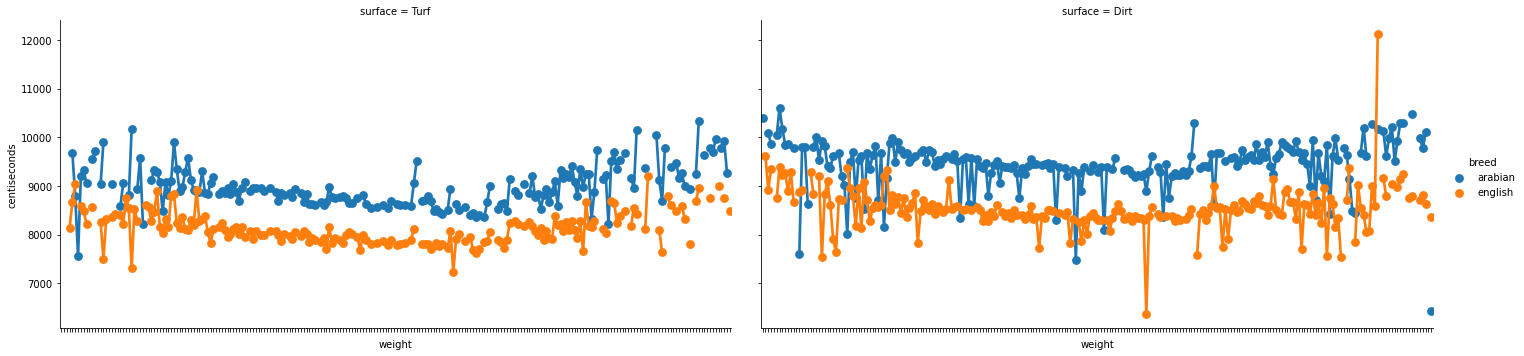

In [132]:
sns.catplot("weight", "centiseconds", col="surface", hue = "breed" , data=df_weight_short, kind="point" ,aspect= 2, ci=None).set(xticklabels=[])
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("tjk_data_plot_short_weight_mean.jpg" , dpi=300)

In [45]:
df_weight_middle = df_weight[df_weight["distance"]=="middle"]

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


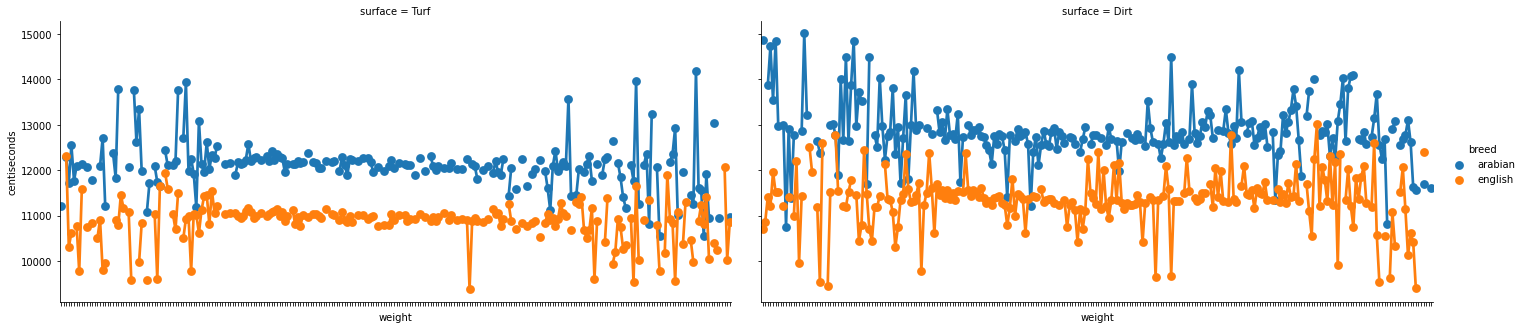

In [68]:
sns.catplot("weight", "centiseconds", col="surface", hue = "breed" , data=df_weight_middle, kind="point" ,aspect= 2, ci=None).set(xticklabels=[])

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("tjk_data_plot_middle_weight_mean.jpg" , dpi=300)

In [47]:
df_weight_long = df_weight[df_weight["distance"]=="long"]

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


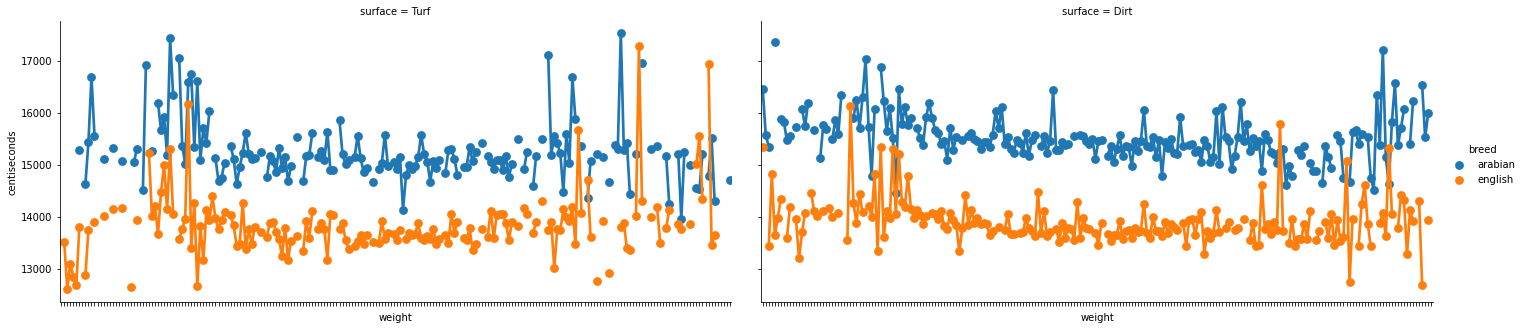

In [69]:
sns.catplot("weight", "centiseconds", col="surface", hue = "breed" , data=df_weight_long, kind="point" ,aspect= 2, ci=None).set(xticklabels=[])

plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig("tjk_data_plot_long_weight_mean.jpg" , dpi=300)

In [49]:
l= [weight_unique_list,["short","middle","long"], ["Turf","Dirt"], ["f","m"],["arabian","english"]]
weight_list = []
centiseconds_list = []
distance_list= []
surface_list=[]
gender_list=[]
breed_list= []
for i in list(itertools.product(*l)):
    mask1 = np.where(df_elected_weight["weight"].values == i[0], True, False)
    mask2 = np.where(df_elected_weight[mask1]["distance_cat"].values == i[1], True, False)
    mask3 = np.where(df_elected_weight[mask1][mask2]["surface"].values == i[2], True, False)
    mask4 = np.where(df_elected_weight[mask1][mask2][mask3]["gender"].values == i[3], True, False)
    mask5 = np.where(df_elected_weight[mask1][mask2][mask3][mask4]["breed"].values == i[4], True, False)
    
    df=df_elected_weight[mask1][mask2][mask3][mask4][mask5]
    min_centiseconds = df["centiseconds"].min()
    centiseconds_list.append(min_centiseconds)
    weight_list.append(i[0])
    distance_list.append(i[1])
    surface_list.append(i[2])
    gender_list.append(i[3])
    breed_list.append(i[4])
    print(i ,end=" -----  ")
    
    print(min_centiseconds)

(58.0, 'short', 'Turf', 'f', 'arabian') -----  5130
(58.0, 'short', 'Turf', 'f', 'english') -----  4962
(58.0, 'short', 'Turf', 'm', 'arabian') -----  5168
(58.0, 'short', 'Turf', 'm', 'english') -----  4758
(58.0, 'short', 'Dirt', 'f', 'arabian') -----  5780
(58.0, 'short', 'Dirt', 'f', 'english') -----  6216
(58.0, 'short', 'Dirt', 'm', 'arabian') -----  5759
(58.0, 'short', 'Dirt', 'm', 'english') -----  5839
(58.0, 'middle', 'Turf', 'f', 'arabian') -----  9800
(58.0, 'middle', 'Turf', 'f', 'english') -----  8831
(58.0, 'middle', 'Turf', 'm', 'arabian') -----  9645
(58.0, 'middle', 'Turf', 'm', 'english') -----  8778
(58.0, 'middle', 'Dirt', 'f', 'arabian') -----  9911
(58.0, 'middle', 'Dirt', 'f', 'english') -----  8964
(58.0, 'middle', 'Dirt', 'm', 'arabian') -----  9715
(58.0, 'middle', 'Dirt', 'm', 'english') -----  8866
(58.0, 'long', 'Turf', 'f', 'arabian') -----  13463
(58.0, 'long', 'Turf', 'f', 'english') -----  12096
(58.0, 'long', 'Turf', 'm', 'arabian') -----  13271
(58.

(46.0, 'long', 'Turf', 'm', 'arabian') -----  13629
(46.0, 'long', 'Turf', 'm', 'english') -----  12304
(46.0, 'long', 'Dirt', 'f', 'arabian') -----  14053
(46.0, 'long', 'Dirt', 'f', 'english') -----  12757
(46.0, 'long', 'Dirt', 'm', 'arabian') -----  13906
(46.0, 'long', 'Dirt', 'm', 'english') -----  12565
(55.0, 'short', 'Turf', 'f', 'arabian') -----  5083
(55.0, 'short', 'Turf', 'f', 'english') -----  4669
(55.0, 'short', 'Turf', 'm', 'arabian') -----  5139
(55.0, 'short', 'Turf', 'm', 'english') -----  4823
(55.0, 'short', 'Dirt', 'f', 'arabian') -----  5933
(55.0, 'short', 'Dirt', 'f', 'english') -----  5435
(55.0, 'short', 'Dirt', 'm', 'arabian') -----  5785
(55.0, 'short', 'Dirt', 'm', 'english') -----  5873
(55.0, 'middle', 'Turf', 'f', 'arabian') -----  9940
(55.0, 'middle', 'Turf', 'f', 'english') -----  8880
(55.0, 'middle', 'Turf', 'm', 'arabian') -----  9902
(55.0, 'middle', 'Turf', 'm', 'english') -----  8767
(55.0, 'middle', 'Dirt', 'f', 'arabian') -----  10054
(55.0,

(67.0, 'short', 'Dirt', 'm', 'english') -----  8838
(67.0, 'middle', 'Turf', 'f', 'arabian') -----  nan
(67.0, 'middle', 'Turf', 'f', 'english') -----  nan
(67.0, 'middle', 'Turf', 'm', 'arabian') -----  10953
(67.0, 'middle', 'Turf', 'm', 'english') -----  10060
(67.0, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(67.0, 'middle', 'Dirt', 'f', 'english') -----  11119
(67.0, 'middle', 'Dirt', 'm', 'arabian') -----  11852
(67.0, 'middle', 'Dirt', 'm', 'english') -----  9731
(67.0, 'long', 'Turf', 'f', 'arabian') -----  nan
(67.0, 'long', 'Turf', 'f', 'english') -----  nan
(67.0, 'long', 'Turf', 'm', 'arabian') -----  nan
(67.0, 'long', 'Turf', 'm', 'english') -----  nan
(67.0, 'long', 'Dirt', 'f', 'arabian') -----  nan
(67.0, 'long', 'Dirt', 'f', 'english') -----  13632
(67.0, 'long', 'Dirt', 'm', 'arabian') -----  nan
(67.0, 'long', 'Dirt', 'm', 'english') -----  14960
(54.5, 'short', 'Turf', 'f', 'arabian') -----  5131
(54.5, 'short', 'Turf', 'f', 'english') -----  4655
(54.5, 'short',

(53.0, 'long', 'Dirt', 'm', 'arabian') -----  13630
(53.0, 'long', 'Dirt', 'm', 'english') -----  12401
(61.0, 'short', 'Turf', 'f', 'arabian') -----  7806
(61.0, 'short', 'Turf', 'f', 'english') -----  5798
(61.0, 'short', 'Turf', 'm', 'arabian') -----  6562
(61.0, 'short', 'Turf', 'm', 'english') -----  5795
(61.0, 'short', 'Dirt', 'f', 'arabian') -----  7962
(61.0, 'short', 'Dirt', 'f', 'english') -----  7167
(61.0, 'short', 'Dirt', 'm', 'arabian') -----  7783
(61.0, 'short', 'Dirt', 'm', 'english') -----  7159
(61.0, 'middle', 'Turf', 'f', 'arabian') -----  9947
(61.0, 'middle', 'Turf', 'f', 'english') -----  9049
(61.0, 'middle', 'Turf', 'm', 'arabian') -----  7988
(61.0, 'middle', 'Turf', 'm', 'english') -----  9020
(61.0, 'middle', 'Dirt', 'f', 'arabian') -----  10077
(61.0, 'middle', 'Dirt', 'f', 'english') -----  9053
(61.0, 'middle', 'Dirt', 'm', 'arabian') -----  9942
(61.0, 'middle', 'Dirt', 'm', 'english') -----  8953
(61.0, 'long', 'Turf', 'f', 'arabian') -----  13726
(61

(57.5, 'middle', 'Dirt', 'f', 'english') -----  9044
(57.5, 'middle', 'Dirt', 'm', 'arabian') -----  9986
(57.5, 'middle', 'Dirt', 'm', 'english') -----  9016
(57.5, 'long', 'Turf', 'f', 'arabian') -----  13520
(57.5, 'long', 'Turf', 'f', 'english') -----  12308
(57.5, 'long', 'Turf', 'm', 'arabian') -----  13338
(57.5, 'long', 'Turf', 'm', 'english') -----  12230
(57.5, 'long', 'Dirt', 'f', 'arabian') -----  13645
(57.5, 'long', 'Dirt', 'f', 'english') -----  12340
(57.5, 'long', 'Dirt', 'm', 'arabian') -----  8557
(57.5, 'long', 'Dirt', 'm', 'english') -----  12337
(52.5, 'short', 'Turf', 'f', 'arabian') -----  5175
(52.5, 'short', 'Turf', 'f', 'english') -----  4670
(52.5, 'short', 'Turf', 'm', 'arabian') -----  6781
(52.5, 'short', 'Turf', 'm', 'english') -----  6095
(52.5, 'short', 'Dirt', 'f', 'arabian') -----  5722
(52.5, 'short', 'Dirt', 'f', 'english') -----  5502
(52.5, 'short', 'Dirt', 'm', 'arabian') -----  6146
(52.5, 'short', 'Dirt', 'm', 'english') -----  6303
(52.5, 'mi

(65.0, 'middle', 'Turf', 'm', 'english') -----  9834
(65.0, 'middle', 'Dirt', 'f', 'arabian') -----  12515
(65.0, 'middle', 'Dirt', 'f', 'english') -----  12087
(65.0, 'middle', 'Dirt', 'm', 'arabian') -----  10540
(65.0, 'middle', 'Dirt', 'm', 'english') -----  9405
(65.0, 'long', 'Turf', 'f', 'arabian') -----  nan
(65.0, 'long', 'Turf', 'f', 'english') -----  nan
(65.0, 'long', 'Turf', 'm', 'arabian') -----  13535
(65.0, 'long', 'Turf', 'm', 'english') -----  13512
(65.0, 'long', 'Dirt', 'f', 'arabian') -----  14812
(65.0, 'long', 'Dirt', 'f', 'english') -----  14009
(65.0, 'long', 'Dirt', 'm', 'arabian') -----  14996
(65.0, 'long', 'Dirt', 'm', 'english') -----  13171
(47.0, 'short', 'Turf', 'f', 'arabian') -----  5474
(47.0, 'short', 'Turf', 'f', 'english') -----  4747
(47.0, 'short', 'Turf', 'm', 'arabian') -----  6674
(47.0, 'short', 'Turf', 'm', 'english') -----  5531
(47.0, 'short', 'Dirt', 'f', 'arabian') -----  7553
(47.0, 'short', 'Dirt', 'f', 'english') -----  6221
(47.0, '

(59.5, 'short', 'Dirt', 'f', 'english') -----  6258
(59.5, 'short', 'Dirt', 'm', 'arabian') -----  6314
(59.5, 'short', 'Dirt', 'm', 'english') -----  7116
(59.5, 'middle', 'Turf', 'f', 'arabian') -----  9826
(59.5, 'middle', 'Turf', 'f', 'english') -----  8905
(59.5, 'middle', 'Turf', 'm', 'arabian') -----  9771
(59.5, 'middle', 'Turf', 'm', 'english') -----  9016
(59.5, 'middle', 'Dirt', 'f', 'arabian') -----  10075
(59.5, 'middle', 'Dirt', 'f', 'english') -----  9047
(59.5, 'middle', 'Dirt', 'm', 'arabian') -----  9817
(59.5, 'middle', 'Dirt', 'm', 'english') -----  9038
(59.5, 'long', 'Turf', 'f', 'arabian') -----  9615
(59.5, 'long', 'Turf', 'f', 'english') -----  12328
(59.5, 'long', 'Turf', 'm', 'arabian') -----  13361
(59.5, 'long', 'Turf', 'm', 'english') -----  12080
(59.5, 'long', 'Dirt', 'f', 'arabian') -----  13817
(59.5, 'long', 'Dirt', 'f', 'english') -----  12575
(59.5, 'long', 'Dirt', 'm', 'arabian') -----  13589
(59.5, 'long', 'Dirt', 'm', 'english') -----  9981
(48.5

(65.5, 'long', 'Turf', 'm', 'arabian') -----  14599
(65.5, 'long', 'Turf', 'm', 'english') -----  16941
(65.5, 'long', 'Dirt', 'f', 'arabian') -----  nan
(65.5, 'long', 'Dirt', 'f', 'english') -----  13939
(65.5, 'long', 'Dirt', 'm', 'arabian') -----  14350
(65.5, 'long', 'Dirt', 'm', 'english') -----  13539
(45.5, 'short', 'Turf', 'f', 'arabian') -----  8368
(45.5, 'short', 'Turf', 'f', 'english') -----  7301
(45.5, 'short', 'Turf', 'm', 'arabian') -----  8096
(45.5, 'short', 'Turf', 'm', 'english') -----  8537
(45.5, 'short', 'Dirt', 'f', 'arabian') -----  8363
(45.5, 'short', 'Dirt', 'f', 'english') -----  7004
(45.5, 'short', 'Dirt', 'm', 'arabian') -----  8468
(45.5, 'short', 'Dirt', 'm', 'english') -----  7700
(45.5, 'middle', 'Turf', 'f', 'arabian') -----  10685
(45.5, 'middle', 'Turf', 'f', 'english') -----  9903
(45.5, 'middle', 'Turf', 'm', 'arabian') -----  10583
(45.5, 'middle', 'Turf', 'm', 'english') -----  9853
(45.5, 'middle', 'Dirt', 'f', 'arabian') -----  10729
(45.5,

(42.5, 'long', 'Turf', 'm', 'arabian') -----  nan
(42.5, 'long', 'Turf', 'm', 'english') -----  13099
(42.5, 'long', 'Dirt', 'f', 'arabian') -----  nan
(42.5, 'long', 'Dirt', 'f', 'english') -----  14085
(42.5, 'long', 'Dirt', 'm', 'arabian') -----  nan
(42.5, 'long', 'Dirt', 'm', 'english') -----  15535
(67.5, 'short', 'Turf', 'f', 'arabian') -----  nan
(67.5, 'short', 'Turf', 'f', 'english') -----  nan
(67.5, 'short', 'Turf', 'm', 'arabian') -----  nan
(67.5, 'short', 'Turf', 'm', 'english') -----  nan
(67.5, 'short', 'Dirt', 'f', 'arabian') -----  nan
(67.5, 'short', 'Dirt', 'f', 'english') -----  nan
(67.5, 'short', 'Dirt', 'm', 'arabian') -----  nan
(67.5, 'short', 'Dirt', 'm', 'english') -----  8762
(67.5, 'middle', 'Turf', 'f', 'arabian') -----  nan
(67.5, 'middle', 'Turf', 'f', 'english') -----  nan
(67.5, 'middle', 'Turf', 'm', 'arabian') -----  nan
(67.5, 'middle', 'Turf', 'm', 'english') -----  nan
(67.5, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(67.5, 'middle', 'Dirt', 

(40.5, 'short', 'Turf', 'm', 'arabian') -----  nan
(40.5, 'short', 'Turf', 'm', 'english') -----  nan
(40.5, 'short', 'Dirt', 'f', 'arabian') -----  nan
(40.5, 'short', 'Dirt', 'f', 'english') -----  nan
(40.5, 'short', 'Dirt', 'm', 'arabian') -----  nan
(40.5, 'short', 'Dirt', 'm', 'english') -----  9614
(40.5, 'middle', 'Turf', 'f', 'arabian') -----  nan
(40.5, 'middle', 'Turf', 'f', 'english') -----  nan
(40.5, 'middle', 'Turf', 'm', 'arabian') -----  nan
(40.5, 'middle', 'Turf', 'm', 'english') -----  nan
(40.5, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(40.5, 'middle', 'Dirt', 'f', 'english') -----  nan
(40.5, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(40.5, 'middle', 'Dirt', 'm', 'english') -----  nan
(40.5, 'long', 'Turf', 'f', 'arabian') -----  nan
(40.5, 'long', 'Turf', 'f', 'english') -----  nan
(40.5, 'long', 'Turf', 'm', 'arabian') -----  nan
(40.5, 'long', 'Turf', 'm', 'english') -----  nan
(40.5, 'long', 'Dirt', 'f', 'arabian') -----  nan
(40.5, 'long', 'Dirt', 'f',

(54.8, 'short', 'Dirt', 'f', 'english') -----  5825
(54.8, 'short', 'Dirt', 'm', 'arabian') -----  6991
(54.8, 'short', 'Dirt', 'm', 'english') -----  6106
(54.8, 'middle', 'Turf', 'f', 'arabian') -----  10362
(54.8, 'middle', 'Turf', 'f', 'english') -----  9171
(54.8, 'middle', 'Turf', 'm', 'arabian') -----  10391
(54.8, 'middle', 'Turf', 'm', 'english') -----  9050
(54.8, 'middle', 'Dirt', 'f', 'arabian') -----  10264
(54.8, 'middle', 'Dirt', 'f', 'english') -----  8984
(54.8, 'middle', 'Dirt', 'm', 'arabian') -----  10191
(54.8, 'middle', 'Dirt', 'm', 'english') -----  9020
(54.8, 'long', 'Turf', 'f', 'arabian') -----  13549
(54.8, 'long', 'Turf', 'f', 'english') -----  12346
(54.8, 'long', 'Turf', 'm', 'arabian') -----  13692
(54.8, 'long', 'Turf', 'm', 'english') -----  12329
(54.8, 'long', 'Dirt', 'f', 'arabian') -----  13656
(54.8, 'long', 'Dirt', 'f', 'english') -----  12482
(54.8, 'long', 'Dirt', 'm', 'arabian') -----  13785
(54.8, 'long', 'Dirt', 'm', 'english') -----  12435


(56.4, 'short', 'Dirt', 'f', 'english') -----  6280
(56.4, 'short', 'Dirt', 'm', 'arabian') -----  6859
(56.4, 'short', 'Dirt', 'm', 'english') -----  5772
(56.4, 'middle', 'Turf', 'f', 'arabian') -----  9985
(56.4, 'middle', 'Turf', 'f', 'english') -----  9023
(56.4, 'middle', 'Turf', 'm', 'arabian') -----  10142
(56.4, 'middle', 'Turf', 'm', 'english') -----  9508
(56.4, 'middle', 'Dirt', 'f', 'arabian') -----  10314
(56.4, 'middle', 'Dirt', 'f', 'english') -----  9083
(56.4, 'middle', 'Dirt', 'm', 'arabian') -----  10028
(56.4, 'middle', 'Dirt', 'm', 'english') -----  9021
(56.4, 'long', 'Turf', 'f', 'arabian') -----  13528
(56.4, 'long', 'Turf', 'f', 'english') -----  12235
(56.4, 'long', 'Turf', 'm', 'arabian') -----  13562
(56.4, 'long', 'Turf', 'm', 'english') -----  12271
(56.4, 'long', 'Dirt', 'f', 'arabian') -----  14047
(56.4, 'long', 'Dirt', 'f', 'english') -----  12534
(56.4, 'long', 'Dirt', 'm', 'arabian') -----  13735
(56.4, 'long', 'Dirt', 'm', 'english') -----  12430
(

(49.3, 'long', 'Dirt', 'm', 'english') -----  13324
(49.2, 'short', 'Turf', 'f', 'arabian') -----  8929
(49.2, 'short', 'Turf', 'f', 'english') -----  7346
(49.2, 'short', 'Turf', 'm', 'arabian') -----  9413
(49.2, 'short', 'Turf', 'm', 'english') -----  7205
(49.2, 'short', 'Dirt', 'f', 'arabian') -----  8620
(49.2, 'short', 'Dirt', 'f', 'english') -----  7501
(49.2, 'short', 'Dirt', 'm', 'arabian') -----  8583
(49.2, 'short', 'Dirt', 'm', 'english') -----  8951
(49.2, 'middle', 'Turf', 'f', 'arabian') -----  10993
(49.2, 'middle', 'Turf', 'f', 'english') -----  10071
(49.2, 'middle', 'Turf', 'm', 'arabian') -----  10120
(49.2, 'middle', 'Turf', 'm', 'english') -----  9154
(49.2, 'middle', 'Dirt', 'f', 'arabian') -----  10462
(49.2, 'middle', 'Dirt', 'f', 'english') -----  9319
(49.2, 'middle', 'Dirt', 'm', 'arabian') -----  12861
(49.2, 'middle', 'Dirt', 'm', 'english') -----  9422
(49.2, 'long', 'Turf', 'f', 'arabian') -----  15520
(49.2, 'long', 'Turf', 'f', 'english') -----  12977

(55.6, 'long', 'Dirt', 'm', 'arabian') -----  13867
(55.6, 'long', 'Dirt', 'm', 'english') -----  12409
(57.3, 'short', 'Turf', 'f', 'arabian') -----  5253
(57.3, 'short', 'Turf', 'f', 'english') -----  6155
(57.3, 'short', 'Turf', 'm', 'arabian') -----  5062
(57.3, 'short', 'Turf', 'm', 'english') -----  4731
(57.3, 'short', 'Dirt', 'f', 'arabian') -----  6702
(57.3, 'short', 'Dirt', 'f', 'english') -----  6174
(57.3, 'short', 'Dirt', 'm', 'arabian') -----  6472
(57.3, 'short', 'Dirt', 'm', 'english') -----  6045
(57.3, 'middle', 'Turf', 'f', 'arabian') -----  10942
(57.3, 'middle', 'Turf', 'f', 'english') -----  9463
(57.3, 'middle', 'Turf', 'm', 'arabian') -----  10007
(57.3, 'middle', 'Turf', 'm', 'english') -----  9015
(57.3, 'middle', 'Dirt', 'f', 'arabian') -----  10217
(57.3, 'middle', 'Dirt', 'f', 'english') -----  9101
(57.3, 'middle', 'Dirt', 'm', 'arabian') -----  10027
(57.3, 'middle', 'Dirt', 'm', 'english') -----  9060
(57.3, 'long', 'Turf', 'f', 'arabian') -----  13599


(54.1, 'long', 'Dirt', 'f', 'english') -----  12519
(54.1, 'long', 'Dirt', 'm', 'arabian') -----  13842
(54.1, 'long', 'Dirt', 'm', 'english') -----  12558
(55.2, 'short', 'Turf', 'f', 'arabian') -----  5211
(55.2, 'short', 'Turf', 'f', 'english') -----  4689
(55.2, 'short', 'Turf', 'm', 'arabian') -----  6635
(55.2, 'short', 'Turf', 'm', 'english') -----  5841
(55.2, 'short', 'Dirt', 'f', 'arabian') -----  6769
(55.2, 'short', 'Dirt', 'f', 'english') -----  5534
(55.2, 'short', 'Dirt', 'm', 'arabian') -----  6806
(55.2, 'short', 'Dirt', 'm', 'english') -----  6456
(55.2, 'middle', 'Turf', 'f', 'arabian') -----  9965
(55.2, 'middle', 'Turf', 'f', 'english') -----  8850
(55.2, 'middle', 'Turf', 'm', 'arabian') -----  10073
(55.2, 'middle', 'Turf', 'm', 'english') -----  8914
(55.2, 'middle', 'Dirt', 'f', 'arabian') -----  10176
(55.2, 'middle', 'Dirt', 'f', 'english') -----  8995
(55.2, 'middle', 'Dirt', 'm', 'arabian') -----  10090
(55.2, 'middle', 'Dirt', 'm', 'english') -----  8923
(

(54.61, 'long', 'Turf', 'm', 'arabian') -----  nan
(54.61, 'long', 'Turf', 'm', 'english') -----  nan
(54.61, 'long', 'Dirt', 'f', 'arabian') -----  nan
(54.61, 'long', 'Dirt', 'f', 'english') -----  nan
(54.61, 'long', 'Dirt', 'm', 'arabian') -----  nan
(54.61, 'long', 'Dirt', 'm', 'english') -----  nan
(58.3, 'short', 'Turf', 'f', 'arabian') -----  7862
(58.3, 'short', 'Turf', 'f', 'english') -----  5825
(58.3, 'short', 'Turf', 'm', 'arabian') -----  6818
(58.3, 'short', 'Turf', 'm', 'english') -----  6182
(58.3, 'short', 'Dirt', 'f', 'arabian') -----  7973
(58.3, 'short', 'Dirt', 'f', 'english') -----  7209
(58.3, 'short', 'Dirt', 'm', 'arabian') -----  6866
(58.3, 'short', 'Dirt', 'm', 'english') -----  6227
(58.3, 'middle', 'Turf', 'f', 'arabian') -----  10148
(58.3, 'middle', 'Turf', 'f', 'english') -----  9444
(58.3, 'middle', 'Turf', 'm', 'arabian') -----  10494
(58.3, 'middle', 'Turf', 'm', 'english') -----  9020
(58.3, 'middle', 'Dirt', 'f', 'arabian') -----  10362
(58.3, 'mi

(57.1, 'long', 'Turf', 'f', 'arabian') -----  13609
(57.1, 'long', 'Turf', 'f', 'english') -----  12268
(57.1, 'long', 'Turf', 'm', 'arabian') -----  13599
(57.1, 'long', 'Turf', 'm', 'english') -----  12051
(57.1, 'long', 'Dirt', 'f', 'arabian') -----  14005
(57.1, 'long', 'Dirt', 'f', 'english') -----  12465
(57.1, 'long', 'Dirt', 'm', 'arabian') -----  13779
(57.1, 'long', 'Dirt', 'm', 'english') -----  12463
(58.4, 'short', 'Turf', 'f', 'arabian') -----  6720
(58.4, 'short', 'Turf', 'f', 'english') -----  7028
(58.4, 'short', 'Turf', 'm', 'arabian') -----  6824
(58.4, 'short', 'Turf', 'm', 'english') -----  7189
(58.4, 'short', 'Dirt', 'f', 'arabian') -----  7825
(58.4, 'short', 'Dirt', 'f', 'english') -----  7175
(58.4, 'short', 'Dirt', 'm', 'arabian') -----  7693
(58.4, 'short', 'Dirt', 'm', 'english') -----  6212
(58.4, 'middle', 'Turf', 'f', 'arabian') -----  10088
(58.4, 'middle', 'Turf', 'f', 'english') -----  9467
(58.4, 'middle', 'Turf', 'm', 'arabian') -----  10219
(58.4, 

(47.2, 'long', 'Turf', 'f', 'english') -----  nan
(47.2, 'long', 'Turf', 'm', 'arabian') -----  nan
(47.2, 'long', 'Turf', 'm', 'english') -----  nan
(47.2, 'long', 'Dirt', 'f', 'arabian') -----  nan
(47.2, 'long', 'Dirt', 'f', 'english') -----  14267
(47.2, 'long', 'Dirt', 'm', 'arabian') -----  nan
(47.2, 'long', 'Dirt', 'm', 'english') -----  14079
(48.7, 'short', 'Turf', 'f', 'arabian') -----  8395
(48.7, 'short', 'Turf', 'f', 'english') -----  7467
(48.7, 'short', 'Turf', 'm', 'arabian') -----  9144
(48.7, 'short', 'Turf', 'm', 'english') -----  9200
(48.7, 'short', 'Dirt', 'f', 'arabian') -----  8914
(48.7, 'short', 'Dirt', 'f', 'english') -----  7834
(48.7, 'short', 'Dirt', 'm', 'arabian') -----  8025
(48.7, 'short', 'Dirt', 'm', 'english') -----  7691
(48.7, 'middle', 'Turf', 'f', 'arabian') -----  11056
(48.7, 'middle', 'Turf', 'f', 'english') -----  9652
(48.7, 'middle', 'Turf', 'm', 'arabian') -----  14876
(48.7, 'middle', 'Turf', 'm', 'english') -----  10247
(48.7, 'middle'

(48.1, 'long', 'Turf', 'f', 'english') -----  14159
(48.1, 'long', 'Turf', 'm', 'arabian') -----  nan
(48.1, 'long', 'Turf', 'm', 'english') -----  nan
(48.1, 'long', 'Dirt', 'f', 'arabian') -----  nan
(48.1, 'long', 'Dirt', 'f', 'english') -----  13417
(48.1, 'long', 'Dirt', 'm', 'arabian') -----  14605
(48.1, 'long', 'Dirt', 'm', 'english') -----  13288
(51.1, 'short', 'Turf', 'f', 'arabian') -----  7924
(51.1, 'short', 'Turf', 'f', 'english') -----  6719
(51.1, 'short', 'Turf', 'm', 'arabian') -----  7880
(51.1, 'short', 'Turf', 'm', 'english') -----  7147
(51.1, 'short', 'Dirt', 'f', 'arabian') -----  7731
(51.1, 'short', 'Dirt', 'f', 'english') -----  6893
(51.1, 'short', 'Dirt', 'm', 'arabian') -----  8259
(51.1, 'short', 'Dirt', 'm', 'english') -----  7374
(51.1, 'middle', 'Turf', 'f', 'arabian') -----  10843
(51.1, 'middle', 'Turf', 'f', 'english') -----  9118
(51.1, 'middle', 'Turf', 'm', 'arabian') -----  10057
(51.1, 'middle', 'Turf', 'm', 'english') -----  9065
(51.1, 'midd

(50.3, 'long', 'Turf', 'm', 'english') -----  12505
(50.3, 'long', 'Dirt', 'f', 'arabian') -----  14722
(50.3, 'long', 'Dirt', 'f', 'english') -----  13061
(50.3, 'long', 'Dirt', 'm', 'arabian') -----  14468
(50.3, 'long', 'Dirt', 'm', 'english') -----  12711
(62.6, 'short', 'Turf', 'f', 'arabian') -----  nan
(62.6, 'short', 'Turf', 'f', 'english') -----  9206
(62.6, 'short', 'Turf', 'm', 'arabian') -----  nan
(62.6, 'short', 'Turf', 'm', 'english') -----  nan
(62.6, 'short', 'Dirt', 'f', 'arabian') -----  nan
(62.6, 'short', 'Dirt', 'f', 'english') -----  9935
(62.6, 'short', 'Dirt', 'm', 'arabian') -----  8287
(62.6, 'short', 'Dirt', 'm', 'english') -----  8433
(62.6, 'middle', 'Turf', 'f', 'arabian') -----  10810
(62.6, 'middle', 'Turf', 'f', 'english') -----  9075
(62.6, 'middle', 'Turf', 'm', 'arabian') -----  10285
(62.6, 'middle', 'Turf', 'm', 'english') -----  9112
(62.6, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(62.6, 'middle', 'Dirt', 'f', 'english') -----  11873
(62.6, '

(61.3, 'middle', 'Turf', 'm', 'arabian') -----  11182
(61.3, 'middle', 'Turf', 'm', 'english') -----  9936
(61.3, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(61.3, 'middle', 'Dirt', 'f', 'english') -----  9691
(61.3, 'middle', 'Dirt', 'm', 'arabian') -----  11479
(61.3, 'middle', 'Dirt', 'm', 'english') -----  9379
(61.3, 'long', 'Turf', 'f', 'arabian') -----  nan
(61.3, 'long', 'Turf', 'f', 'english') -----  nan
(61.3, 'long', 'Turf', 'm', 'arabian') -----  nan
(61.3, 'long', 'Turf', 'm', 'english') -----  nan
(61.3, 'long', 'Dirt', 'f', 'arabian') -----  nan
(61.3, 'long', 'Dirt', 'f', 'english') -----  nan
(61.3, 'long', 'Dirt', 'm', 'arabian') -----  nan
(61.3, 'long', 'Dirt', 'm', 'english') -----  13449
(46.7, 'short', 'Turf', 'f', 'arabian') -----  nan
(46.7, 'short', 'Turf', 'f', 'english') -----  nan
(46.7, 'short', 'Turf', 'm', 'arabian') -----  nan
(46.7, 'short', 'Turf', 'm', 'english') -----  nan
(46.7, 'short', 'Dirt', 'f', 'arabian') -----  8528
(46.7, 'short', 'Dirt',

(53.8, 'short', 'Turf', 'f', 'english') -----  5611
(53.8, 'short', 'Turf', 'm', 'arabian') -----  5366
(53.8, 'short', 'Turf', 'm', 'english') -----  5139
(53.8, 'short', 'Dirt', 'f', 'arabian') -----  6947
(53.8, 'short', 'Dirt', 'f', 'english') -----  6326
(53.8, 'short', 'Dirt', 'm', 'arabian') -----  7828
(53.8, 'short', 'Dirt', 'm', 'english') -----  7057
(53.8, 'middle', 'Turf', 'f', 'arabian') -----  10091
(53.8, 'middle', 'Turf', 'f', 'english') -----  9008
(53.8, 'middle', 'Turf', 'm', 'arabian') -----  10089
(53.8, 'middle', 'Turf', 'm', 'english') -----  9231
(53.8, 'middle', 'Dirt', 'f', 'arabian') -----  10218
(53.8, 'middle', 'Dirt', 'f', 'english') -----  9169
(53.8, 'middle', 'Dirt', 'm', 'arabian') -----  10199
(53.8, 'middle', 'Dirt', 'm', 'english') -----  9156
(53.8, 'long', 'Turf', 'f', 'arabian') -----  14035
(53.8, 'long', 'Turf', 'f', 'english') -----  12155
(53.8, 'long', 'Turf', 'm', 'arabian') -----  13612
(53.8, 'long', 'Turf', 'm', 'english') -----  12546


(59.3, 'long', 'Turf', 'm', 'english') -----  12386
(59.3, 'long', 'Dirt', 'f', 'arabian') -----  14098
(59.3, 'long', 'Dirt', 'f', 'english') -----  15115
(59.3, 'long', 'Dirt', 'm', 'arabian') -----  14218
(59.3, 'long', 'Dirt', 'm', 'english') -----  13338
(57.9, 'short', 'Turf', 'f', 'arabian') -----  5342
(57.9, 'short', 'Turf', 'f', 'english') -----  6300
(57.9, 'short', 'Turf', 'm', 'arabian') -----  6678
(57.9, 'short', 'Turf', 'm', 'english') -----  4714
(57.9, 'short', 'Dirt', 'f', 'arabian') -----  7286
(57.9, 'short', 'Dirt', 'f', 'english') -----  6442
(57.9, 'short', 'Dirt', 'm', 'arabian') -----  6785
(57.9, 'short', 'Dirt', 'm', 'english') -----  6772
(57.9, 'middle', 'Turf', 'f', 'arabian') -----  10026
(57.9, 'middle', 'Turf', 'f', 'english') -----  9770
(57.9, 'middle', 'Turf', 'm', 'arabian') -----  10604
(57.9, 'middle', 'Turf', 'm', 'english') -----  9692
(57.9, 'middle', 'Dirt', 'f', 'arabian') -----  9994
(57.9, 'middle', 'Dirt', 'f', 'english') -----  10156
(57

(49.1, 'middle', 'Turf', 'f', 'english') -----  9706
(49.1, 'middle', 'Turf', 'm', 'arabian') -----  10916
(49.1, 'middle', 'Turf', 'm', 'english') -----  9620
(49.1, 'middle', 'Dirt', 'f', 'arabian') -----  12326
(49.1, 'middle', 'Dirt', 'f', 'english') -----  9336
(49.1, 'middle', 'Dirt', 'm', 'arabian') -----  15292
(49.1, 'middle', 'Dirt', 'm', 'english') -----  12387
(49.1, 'long', 'Turf', 'f', 'arabian') -----  16105
(49.1, 'long', 'Turf', 'f', 'english') -----  13357
(49.1, 'long', 'Turf', 'm', 'arabian') -----  17064
(49.1, 'long', 'Turf', 'm', 'english') -----  18972
(49.1, 'long', 'Dirt', 'f', 'arabian') -----  nan
(49.1, 'long', 'Dirt', 'f', 'english') -----  13991
(49.1, 'long', 'Dirt', 'm', 'arabian') -----  15395
(49.1, 'long', 'Dirt', 'm', 'english') -----  13779
(51.4, 'short', 'Turf', 'f', 'arabian') -----  6688
(51.4, 'short', 'Turf', 'f', 'english') -----  6169
(51.4, 'short', 'Turf', 'm', 'arabian') -----  7744
(51.4, 'short', 'Turf', 'm', 'english') -----  6686
(51

(50.4, 'short', 'Turf', 'm', 'arabian') -----  7874
(50.4, 'short', 'Turf', 'm', 'english') -----  7161
(50.4, 'short', 'Dirt', 'f', 'arabian') -----  8291
(50.4, 'short', 'Dirt', 'f', 'english') -----  7392
(50.4, 'short', 'Dirt', 'm', 'arabian') -----  8277
(50.4, 'short', 'Dirt', 'm', 'english') -----  7451
(50.4, 'middle', 'Turf', 'f', 'arabian') -----  10432
(50.4, 'middle', 'Turf', 'f', 'english') -----  9688
(50.4, 'middle', 'Turf', 'm', 'arabian') -----  10938
(50.4, 'middle', 'Turf', 'm', 'english') -----  9040
(50.4, 'middle', 'Dirt', 'f', 'arabian') -----  10966
(50.4, 'middle', 'Dirt', 'f', 'english') -----  9293
(50.4, 'middle', 'Dirt', 'm', 'arabian') -----  10459
(50.4, 'middle', 'Dirt', 'm', 'english') -----  9297
(50.4, 'long', 'Turf', 'f', 'arabian') -----  13662
(50.4, 'long', 'Turf', 'f', 'english') -----  13214
(50.4, 'long', 'Turf', 'm', 'arabian') -----  13683
(50.4, 'long', 'Turf', 'm', 'english') -----  12239
(50.4, 'long', 'Dirt', 'f', 'arabian') -----  14394


(48.9, 'long', 'Dirt', 'm', 'english') -----  12897
(49.4, 'short', 'Turf', 'f', 'arabian') -----  8409
(49.4, 'short', 'Turf', 'f', 'english') -----  7198
(49.4, 'short', 'Turf', 'm', 'arabian') -----  8126
(49.4, 'short', 'Turf', 'm', 'english') -----  8459
(49.4, 'short', 'Dirt', 'f', 'arabian') -----  8444
(49.4, 'short', 'Dirt', 'f', 'english') -----  9029
(49.4, 'short', 'Dirt', 'm', 'arabian') -----  8419
(49.4, 'short', 'Dirt', 'm', 'english') -----  7596
(49.4, 'middle', 'Turf', 'f', 'arabian') -----  nan
(49.4, 'middle', 'Turf', 'f', 'english') -----  9729
(49.4, 'middle', 'Turf', 'm', 'arabian') -----  12721
(49.4, 'middle', 'Turf', 'm', 'english') -----  9677
(49.4, 'middle', 'Dirt', 'f', 'arabian') -----  10814
(49.4, 'middle', 'Dirt', 'f', 'english') -----  nan
(49.4, 'middle', 'Dirt', 'm', 'arabian') -----  10978
(49.4, 'middle', 'Dirt', 'm', 'english') -----  9886
(49.4, 'long', 'Turf', 'f', 'arabian') -----  17325
(49.4, 'long', 'Turf', 'f', 'english') -----  nan
(49.4

(60.3, 'short', 'Turf', 'f', 'arabian') -----  nan
(60.3, 'short', 'Turf', 'f', 'english') -----  nan
(60.3, 'short', 'Turf', 'm', 'arabian') -----  8703
(60.3, 'short', 'Turf', 'm', 'english') -----  7205
(60.3, 'short', 'Dirt', 'f', 'arabian') -----  9208
(60.3, 'short', 'Dirt', 'f', 'english') -----  7991
(60.3, 'short', 'Dirt', 'm', 'arabian') -----  8893
(60.3, 'short', 'Dirt', 'm', 'english') -----  7765
(60.3, 'middle', 'Turf', 'f', 'arabian') -----  10713
(60.3, 'middle', 'Turf', 'f', 'english') -----  10079
(60.3, 'middle', 'Turf', 'm', 'arabian') -----  10143
(60.3, 'middle', 'Turf', 'm', 'english') -----  10170
(60.3, 'middle', 'Dirt', 'f', 'arabian') -----  13212
(60.3, 'middle', 'Dirt', 'f', 'english') -----  9265
(60.3, 'middle', 'Dirt', 'm', 'arabian') -----  10837
(60.3, 'middle', 'Dirt', 'm', 'english') -----  9355
(60.3, 'long', 'Turf', 'f', 'arabian') -----  14326
(60.3, 'long', 'Turf', 'f', 'english') -----  12545
(60.3, 'long', 'Turf', 'm', 'arabian') -----  14916


(62.2, 'short', 'Dirt', 'm', 'arabian') -----  8433
(62.2, 'short', 'Dirt', 'm', 'english') -----  7519
(62.2, 'middle', 'Turf', 'f', 'arabian') -----  11108
(62.2, 'middle', 'Turf', 'f', 'english') -----  11826
(62.2, 'middle', 'Turf', 'm', 'arabian') -----  10103
(62.2, 'middle', 'Turf', 'm', 'english') -----  10861
(62.2, 'middle', 'Dirt', 'f', 'arabian') -----  13495
(62.2, 'middle', 'Dirt', 'f', 'english') -----  9894
(62.2, 'middle', 'Dirt', 'm', 'arabian') -----  13659
(62.2, 'middle', 'Dirt', 'm', 'english') -----  10016
(62.2, 'long', 'Turf', 'f', 'arabian') -----  nan
(62.2, 'long', 'Turf', 'f', 'english') -----  nan
(62.2, 'long', 'Turf', 'm', 'arabian') -----  nan
(62.2, 'long', 'Turf', 'm', 'english') -----  13261
(62.2, 'long', 'Dirt', 'f', 'arabian') -----  nan
(62.2, 'long', 'Dirt', 'f', 'english') -----  nan
(62.2, 'long', 'Dirt', 'm', 'arabian') -----  15254
(62.2, 'long', 'Dirt', 'm', 'english') -----  13606
(46.35, 'short', 'Turf', 'f', 'arabian') -----  nan
(46.35,

(46.8, 'long', 'Dirt', 'f', 'english') -----  14003
(46.8, 'long', 'Dirt', 'm', 'arabian') -----  nan
(46.8, 'long', 'Dirt', 'm', 'english') -----  nan
(44.2, 'short', 'Turf', 'f', 'arabian') -----  nan
(44.2, 'short', 'Turf', 'f', 'english') -----  nan
(44.2, 'short', 'Turf', 'm', 'arabian') -----  nan
(44.2, 'short', 'Turf', 'm', 'english') -----  nan
(44.2, 'short', 'Dirt', 'f', 'arabian') -----  nan
(44.2, 'short', 'Dirt', 'f', 'english') -----  nan
(44.2, 'short', 'Dirt', 'm', 'arabian') -----  nan
(44.2, 'short', 'Dirt', 'm', 'english') -----  nan
(44.2, 'middle', 'Turf', 'f', 'arabian') -----  nan
(44.2, 'middle', 'Turf', 'f', 'english') -----  nan
(44.2, 'middle', 'Turf', 'm', 'arabian') -----  nan
(44.2, 'middle', 'Turf', 'm', 'english') -----  nan
(44.2, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(44.2, 'middle', 'Dirt', 'f', 'english') -----  nan
(44.2, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(44.2, 'middle', 'Dirt', 'm', 'english') -----  nan
(44.2, 'long', 'Turf', '

(47.7, 'long', 'Dirt', 'm', 'arabian') -----  nan
(47.7, 'long', 'Dirt', 'm', 'english') -----  nan
(52.75, 'short', 'Turf', 'f', 'arabian') -----  nan
(52.75, 'short', 'Turf', 'f', 'english') -----  nan
(52.75, 'short', 'Turf', 'm', 'arabian') -----  nan
(52.75, 'short', 'Turf', 'm', 'english') -----  nan
(52.75, 'short', 'Dirt', 'f', 'arabian') -----  nan
(52.75, 'short', 'Dirt', 'f', 'english') -----  nan
(52.75, 'short', 'Dirt', 'm', 'arabian') -----  nan
(52.75, 'short', 'Dirt', 'm', 'english') -----  nan
(52.75, 'middle', 'Turf', 'f', 'arabian') -----  nan
(52.75, 'middle', 'Turf', 'f', 'english') -----  nan
(52.75, 'middle', 'Turf', 'm', 'arabian') -----  nan
(52.75, 'middle', 'Turf', 'm', 'english') -----  nan
(52.75, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(52.75, 'middle', 'Dirt', 'f', 'english') -----  10962
(52.75, 'middle', 'Dirt', 'm', 'arabian') -----  11406
(52.75, 'middle', 'Dirt', 'm', 'english') -----  10624
(52.75, 'long', 'Turf', 'f', 'arabian') -----  nan
(52

(55.35, 'middle', 'Dirt', 'm', 'english') -----  nan
(55.35, 'long', 'Turf', 'f', 'arabian') -----  nan
(55.35, 'long', 'Turf', 'f', 'english') -----  nan
(55.35, 'long', 'Turf', 'm', 'arabian') -----  nan
(55.35, 'long', 'Turf', 'm', 'english') -----  nan
(55.35, 'long', 'Dirt', 'f', 'arabian') -----  nan
(55.35, 'long', 'Dirt', 'f', 'english') -----  nan
(55.35, 'long', 'Dirt', 'm', 'arabian') -----  nan
(55.35, 'long', 'Dirt', 'm', 'english') -----  nan
(48.75, 'short', 'Turf', 'f', 'arabian') -----  nan
(48.75, 'short', 'Turf', 'f', 'english') -----  nan
(48.75, 'short', 'Turf', 'm', 'arabian') -----  nan
(48.75, 'short', 'Turf', 'm', 'english') -----  nan
(48.75, 'short', 'Dirt', 'f', 'arabian') -----  nan
(48.75, 'short', 'Dirt', 'f', 'english') -----  nan
(48.75, 'short', 'Dirt', 'm', 'arabian') -----  nan
(48.75, 'short', 'Dirt', 'm', 'english') -----  nan
(48.75, 'middle', 'Turf', 'f', 'arabian') -----  nan
(48.75, 'middle', 'Turf', 'f', 'english') -----  nan
(48.75, 'middle',

(57.85, 'middle', 'Dirt', 'm', 'arabian') -----  13296
(57.85, 'middle', 'Dirt', 'm', 'english') -----  nan
(57.85, 'long', 'Turf', 'f', 'arabian') -----  nan
(57.85, 'long', 'Turf', 'f', 'english') -----  nan
(57.85, 'long', 'Turf', 'm', 'arabian') -----  nan
(57.85, 'long', 'Turf', 'm', 'english') -----  nan
(57.85, 'long', 'Dirt', 'f', 'arabian') -----  nan
(57.85, 'long', 'Dirt', 'f', 'english') -----  nan
(57.85, 'long', 'Dirt', 'm', 'arabian') -----  nan
(57.85, 'long', 'Dirt', 'm', 'english') -----  nan
(61.8, 'short', 'Turf', 'f', 'arabian') -----  nan
(61.8, 'short', 'Turf', 'f', 'english') -----  8462
(61.8, 'short', 'Turf', 'm', 'arabian') -----  8720
(61.8, 'short', 'Turf', 'm', 'english') -----  8503
(61.8, 'short', 'Dirt', 'f', 'arabian') -----  9852
(61.8, 'short', 'Dirt', 'f', 'english') -----  nan
(61.8, 'short', 'Dirt', 'm', 'arabian') -----  nan
(61.8, 'short', 'Dirt', 'm', 'english') -----  7562
(61.8, 'middle', 'Turf', 'f', 'arabian') -----  10829
(61.8, 'middle', 

(56.75, 'middle', 'Turf', 'm', 'english') -----  nan
(56.75, 'middle', 'Dirt', 'f', 'arabian') -----  13048
(56.75, 'middle', 'Dirt', 'f', 'english') -----  12093
(56.75, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(56.75, 'middle', 'Dirt', 'm', 'english') -----  nan
(56.75, 'long', 'Turf', 'f', 'arabian') -----  nan
(56.75, 'long', 'Turf', 'f', 'english') -----  nan
(56.75, 'long', 'Turf', 'm', 'arabian') -----  nan
(56.75, 'long', 'Turf', 'm', 'english') -----  nan
(56.75, 'long', 'Dirt', 'f', 'arabian') -----  nan
(56.75, 'long', 'Dirt', 'f', 'english') -----  nan
(56.75, 'long', 'Dirt', 'm', 'arabian') -----  14781
(56.75, 'long', 'Dirt', 'm', 'english') -----  13630
(51.35, 'short', 'Turf', 'f', 'arabian') -----  nan
(51.35, 'short', 'Turf', 'f', 'english') -----  nan
(51.35, 'short', 'Turf', 'm', 'arabian') -----  nan
(51.35, 'short', 'Turf', 'm', 'english') -----  nan
(51.35, 'short', 'Dirt', 'f', 'arabian') -----  nan
(51.35, 'short', 'Dirt', 'f', 'english') -----  nan
(51.35,

(55.25, 'short', 'Dirt', 'm', 'arabian') -----  nan
(55.25, 'short', 'Dirt', 'm', 'english') -----  nan
(55.25, 'middle', 'Turf', 'f', 'arabian') -----  nan
(55.25, 'middle', 'Turf', 'f', 'english') -----  nan
(55.25, 'middle', 'Turf', 'm', 'arabian') -----  nan
(55.25, 'middle', 'Turf', 'm', 'english') -----  nan
(55.25, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(55.25, 'middle', 'Dirt', 'f', 'english') -----  nan
(55.25, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(55.25, 'middle', 'Dirt', 'm', 'english') -----  11182
(55.25, 'long', 'Turf', 'f', 'arabian') -----  nan
(55.25, 'long', 'Turf', 'f', 'english') -----  nan
(55.25, 'long', 'Turf', 'm', 'arabian') -----  nan
(55.25, 'long', 'Turf', 'm', 'english') -----  nan
(55.25, 'long', 'Dirt', 'f', 'arabian') -----  nan
(55.25, 'long', 'Dirt', 'f', 'english') -----  nan
(55.25, 'long', 'Dirt', 'm', 'arabian') -----  nan
(55.25, 'long', 'Dirt', 'm', 'english') -----  nan
(54.65, 'short', 'Turf', 'f', 'arabian') -----  nan
(54.65, 's

(50.25, 'short', 'Turf', 'f', 'arabian') -----  nan
(50.25, 'short', 'Turf', 'f', 'english') -----  nan
(50.25, 'short', 'Turf', 'm', 'arabian') -----  nan
(50.25, 'short', 'Turf', 'm', 'english') -----  nan
(50.25, 'short', 'Dirt', 'f', 'arabian') -----  nan
(50.25, 'short', 'Dirt', 'f', 'english') -----  7828
(50.25, 'short', 'Dirt', 'm', 'arabian') -----  nan
(50.25, 'short', 'Dirt', 'm', 'english') -----  nan
(50.25, 'middle', 'Turf', 'f', 'arabian') -----  nan
(50.25, 'middle', 'Turf', 'f', 'english') -----  nan
(50.25, 'middle', 'Turf', 'm', 'arabian') -----  nan
(50.25, 'middle', 'Turf', 'm', 'english') -----  nan
(50.25, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(50.25, 'middle', 'Dirt', 'f', 'english') -----  12383
(50.25, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(50.25, 'middle', 'Dirt', 'm', 'english') -----  nan
(50.25, 'long', 'Turf', 'f', 'arabian') -----  nan
(50.25, 'long', 'Turf', 'f', 'english') -----  nan
(50.25, 'long', 'Turf', 'm', 'arabian') -----  nan
(50.

(58.75, 'short', 'Dirt', 'f', 'english') -----  nan
(58.75, 'short', 'Dirt', 'm', 'arabian') -----  nan
(58.75, 'short', 'Dirt', 'm', 'english') -----  nan
(58.75, 'middle', 'Turf', 'f', 'arabian') -----  nan
(58.75, 'middle', 'Turf', 'f', 'english') -----  nan
(58.75, 'middle', 'Turf', 'm', 'arabian') -----  nan
(58.75, 'middle', 'Turf', 'm', 'english') -----  nan
(58.75, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(58.75, 'middle', 'Dirt', 'f', 'english') -----  nan
(58.75, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(58.75, 'middle', 'Dirt', 'm', 'english') -----  nan
(58.75, 'long', 'Turf', 'f', 'arabian') -----  nan
(58.75, 'long', 'Turf', 'f', 'english') -----  nan
(58.75, 'long', 'Turf', 'm', 'arabian') -----  nan
(58.75, 'long', 'Turf', 'm', 'english') -----  nan
(58.75, 'long', 'Dirt', 'f', 'arabian') -----  16204
(58.75, 'long', 'Dirt', 'f', 'english') -----  nan
(58.75, 'long', 'Dirt', 'm', 'arabian') -----  nan
(58.75, 'long', 'Dirt', 'm', 'english') -----  nan
(50.35, 's

(58.65, 'short', 'Turf', 'm', 'english') -----  nan
(58.65, 'short', 'Dirt', 'f', 'arabian') -----  nan
(58.65, 'short', 'Dirt', 'f', 'english') -----  nan
(58.65, 'short', 'Dirt', 'm', 'arabian') -----  nan
(58.65, 'short', 'Dirt', 'm', 'english') -----  nan
(58.65, 'middle', 'Turf', 'f', 'arabian') -----  nan
(58.65, 'middle', 'Turf', 'f', 'english') -----  nan
(58.65, 'middle', 'Turf', 'm', 'arabian') -----  nan
(58.65, 'middle', 'Turf', 'm', 'english') -----  nan
(58.65, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(58.65, 'middle', 'Dirt', 'f', 'english') -----  12100
(58.65, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(58.65, 'middle', 'Dirt', 'm', 'english') -----  nan
(58.65, 'long', 'Turf', 'f', 'arabian') -----  nan
(58.65, 'long', 'Turf', 'f', 'english') -----  nan
(58.65, 'long', 'Turf', 'm', 'arabian') -----  nan
(58.65, 'long', 'Turf', 'm', 'english') -----  nan
(58.65, 'long', 'Dirt', 'f', 'arabian') -----  nan
(58.65, 'long', 'Dirt', 'f', 'english') -----  nan
(58.65, 

(58.15, 'short', 'Turf', 'm', 'english') -----  nan
(58.15, 'short', 'Dirt', 'f', 'arabian') -----  nan
(58.15, 'short', 'Dirt', 'f', 'english') -----  nan
(58.15, 'short', 'Dirt', 'm', 'arabian') -----  nan
(58.15, 'short', 'Dirt', 'm', 'english') -----  nan
(58.15, 'middle', 'Turf', 'f', 'arabian') -----  nan
(58.15, 'middle', 'Turf', 'f', 'english') -----  nan
(58.15, 'middle', 'Turf', 'm', 'arabian') -----  nan
(58.15, 'middle', 'Turf', 'm', 'english') -----  nan
(58.15, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(58.15, 'middle', 'Dirt', 'f', 'english') -----  nan
(58.15, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(58.15, 'middle', 'Dirt', 'm', 'english') -----  11991
(58.15, 'long', 'Turf', 'f', 'arabian') -----  nan
(58.15, 'long', 'Turf', 'f', 'english') -----  nan
(58.15, 'long', 'Turf', 'm', 'arabian') -----  nan
(58.15, 'long', 'Turf', 'm', 'english') -----  nan
(58.15, 'long', 'Dirt', 'f', 'arabian') -----  nan
(58.15, 'long', 'Dirt', 'f', 'english') -----  nan
(58.15, 

(62.9, 'long', 'Dirt', 'f', 'english') -----  nan
(62.9, 'long', 'Dirt', 'm', 'arabian') -----  nan
(62.9, 'long', 'Dirt', 'm', 'english') -----  nan
(61.4, 'short', 'Turf', 'f', 'arabian') -----  9689
(61.4, 'short', 'Turf', 'f', 'english') -----  nan
(61.4, 'short', 'Turf', 'm', 'arabian') -----  nan
(61.4, 'short', 'Turf', 'm', 'english') -----  8660
(61.4, 'short', 'Dirt', 'f', 'arabian') -----  8707
(61.4, 'short', 'Dirt', 'f', 'english') -----  nan
(61.4, 'short', 'Dirt', 'm', 'arabian') -----  nan
(61.4, 'short', 'Dirt', 'm', 'english') -----  8408
(61.4, 'middle', 'Turf', 'f', 'arabian') -----  nan
(61.4, 'middle', 'Turf', 'f', 'english') -----  nan
(61.4, 'middle', 'Turf', 'm', 'arabian') -----  nan
(61.4, 'middle', 'Turf', 'm', 'english') -----  nan
(61.4, 'middle', 'Dirt', 'f', 'arabian') -----  10301
(61.4, 'middle', 'Dirt', 'f', 'english') -----  nan
(61.4, 'middle', 'Dirt', 'm', 'arabian') -----  13616
(61.4, 'middle', 'Dirt', 'm', 'english') -----  12321
(61.4, 'long', '

(63.9, 'middle', 'Dirt', 'f', 'english') -----  9637
(63.9, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(63.9, 'middle', 'Dirt', 'm', 'english') -----  nan
(63.9, 'long', 'Turf', 'f', 'arabian') -----  nan
(63.9, 'long', 'Turf', 'f', 'english') -----  nan
(63.9, 'long', 'Turf', 'm', 'arabian') -----  nan
(63.9, 'long', 'Turf', 'm', 'english') -----  nan
(63.9, 'long', 'Dirt', 'f', 'arabian') -----  nan
(63.9, 'long', 'Dirt', 'f', 'english') -----  nan
(63.9, 'long', 'Dirt', 'm', 'arabian') -----  nan
(63.9, 'long', 'Dirt', 'm', 'english') -----  nan
(60.9, 'short', 'Turf', 'f', 'arabian') -----  nan
(60.9, 'short', 'Turf', 'f', 'english') -----  nan
(60.9, 'short', 'Turf', 'm', 'arabian') -----  nan
(60.9, 'short', 'Turf', 'm', 'english') -----  nan
(60.9, 'short', 'Dirt', 'f', 'arabian') -----  8942
(60.9, 'short', 'Dirt', 'f', 'english') -----  nan
(60.9, 'short', 'Dirt', 'm', 'arabian') -----  9808
(60.9, 'short', 'Dirt', 'm', 'english') -----  7704
(60.9, 'middle', 'Turf', 'f', 'a

(60.54, 'short', 'Dirt', 'm', 'arabian') -----  nan
(60.54, 'short', 'Dirt', 'm', 'english') -----  nan
(60.54, 'middle', 'Turf', 'f', 'arabian') -----  nan
(60.54, 'middle', 'Turf', 'f', 'english') -----  nan
(60.54, 'middle', 'Turf', 'm', 'arabian') -----  nan
(60.54, 'middle', 'Turf', 'm', 'english') -----  nan
(60.54, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(60.54, 'middle', 'Dirt', 'f', 'english') -----  nan
(60.54, 'middle', 'Dirt', 'm', 'arabian') -----  11884
(60.54, 'middle', 'Dirt', 'm', 'english') -----  nan
(60.54, 'long', 'Turf', 'f', 'arabian') -----  nan
(60.54, 'long', 'Turf', 'f', 'english') -----  nan
(60.54, 'long', 'Turf', 'm', 'arabian') -----  nan
(60.54, 'long', 'Turf', 'm', 'english') -----  nan
(60.54, 'long', 'Dirt', 'f', 'arabian') -----  nan
(60.54, 'long', 'Dirt', 'f', 'english') -----  nan
(60.54, 'long', 'Dirt', 'm', 'arabian') -----  nan
(60.54, 'long', 'Dirt', 'm', 'english') -----  nan
(62.4, 'short', 'Turf', 'f', 'arabian') -----  nan
(62.4, 'sho

(51.55, 'short', 'Turf', 'f', 'arabian') -----  nan
(51.55, 'short', 'Turf', 'f', 'english') -----  nan
(51.55, 'short', 'Turf', 'm', 'arabian') -----  nan
(51.55, 'short', 'Turf', 'm', 'english') -----  nan
(51.55, 'short', 'Dirt', 'f', 'arabian') -----  8345
(51.55, 'short', 'Dirt', 'f', 'english') -----  nan
(51.55, 'short', 'Dirt', 'm', 'arabian') -----  nan
(51.55, 'short', 'Dirt', 'm', 'english') -----  nan
(51.55, 'middle', 'Turf', 'f', 'arabian') -----  nan
(51.55, 'middle', 'Turf', 'f', 'english') -----  nan
(51.55, 'middle', 'Turf', 'm', 'arabian') -----  nan
(51.55, 'middle', 'Turf', 'm', 'english') -----  nan
(51.55, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(51.55, 'middle', 'Dirt', 'f', 'english') -----  nan
(51.55, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(51.55, 'middle', 'Dirt', 'm', 'english') -----  nan
(51.55, 'long', 'Turf', 'f', 'arabian') -----  nan
(51.55, 'long', 'Turf', 'f', 'english') -----  nan
(51.55, 'long', 'Turf', 'm', 'arabian') -----  nan
(51.55

(57.54, 'long', 'Dirt', 'f', 'english') -----  nan
(57.54, 'long', 'Dirt', 'm', 'arabian') -----  nan
(57.54, 'long', 'Dirt', 'm', 'english') -----  nan
(55.05, 'short', 'Turf', 'f', 'arabian') -----  nan
(55.05, 'short', 'Turf', 'f', 'english') -----  nan
(55.05, 'short', 'Turf', 'm', 'arabian') -----  nan
(55.05, 'short', 'Turf', 'm', 'english') -----  nan
(55.05, 'short', 'Dirt', 'f', 'arabian') -----  nan
(55.05, 'short', 'Dirt', 'f', 'english') -----  nan
(55.05, 'short', 'Dirt', 'm', 'arabian') -----  nan
(55.05, 'short', 'Dirt', 'm', 'english') -----  8341
(55.05, 'middle', 'Turf', 'f', 'arabian') -----  nan
(55.05, 'middle', 'Turf', 'f', 'english') -----  nan
(55.05, 'middle', 'Turf', 'm', 'arabian') -----  nan
(55.05, 'middle', 'Turf', 'm', 'english') -----  nan
(55.05, 'middle', 'Dirt', 'f', 'arabian') -----  nan
(55.05, 'middle', 'Dirt', 'f', 'english') -----  nan
(55.05, 'middle', 'Dirt', 'm', 'arabian') -----  nan
(55.05, 'middle', 'Dirt', 'm', 'english') -----  nan
(55.05

In [50]:
my_dict ={"weight": weight_list , "distance":distance_list, "surface":surface_list , "gender" :gender_list , "breed": breed_list , "centiseconds" : centiseconds_list}

In [51]:
df_weight_min = pd.DataFrame(my_dict)

In [52]:
df_weight_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        7080 non-null   float64
 1   distance      7080 non-null   object 
 2   surface       7080 non-null   object 
 3   gender        7080 non-null   object 
 4   breed         7080 non-null   object 
 5   centiseconds  4071 non-null   float64
dtypes: float64(2), object(4)
memory usage: 332.0+ KB


In [53]:
df_weight_min= df_weight_min[df_weight_min["centiseconds"].notnull()]

In [54]:
df_weight_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4071 entries, 0 to 7069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight        4071 non-null   float64
 1   distance      4071 non-null   object 
 2   surface       4071 non-null   object 
 3   gender        4071 non-null   object 
 4   breed         4071 non-null   object 
 5   centiseconds  4071 non-null   float64
dtypes: float64(2), object(4)
memory usage: 222.6+ KB


In [55]:
df_weight_short_min = df_weight_min[df_weight_min["distance"]=="short"]

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


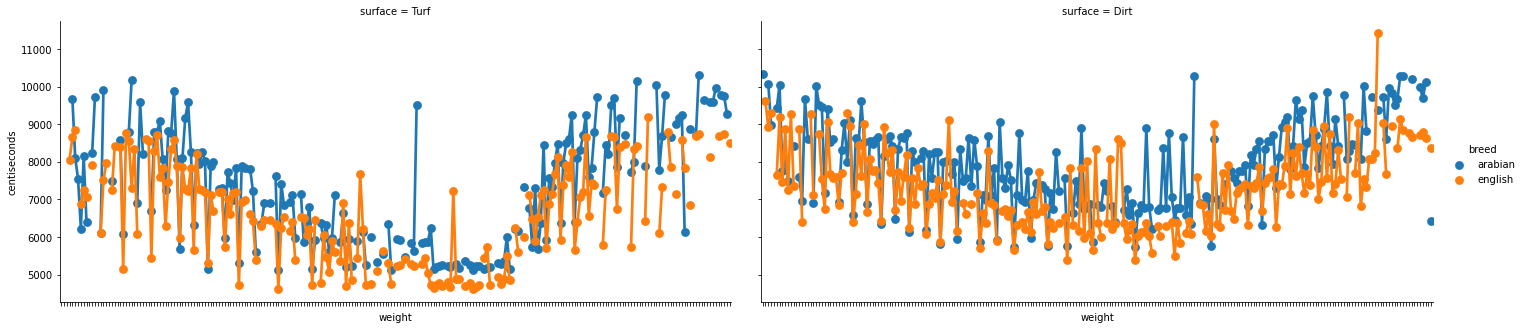

In [70]:
sns.catplot("weight", "centiseconds", col="surface", hue = "breed" , data=df_weight_short_min, kind="point" ,aspect= 2, ci=None).set(xticklabels=[])

#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("tjk_data_plot_short_weight_min.jpg" , dpi=300)

In [57]:
df_weight_middle_min = df_weight_min[df_weight_min["distance"]=="middle"]

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


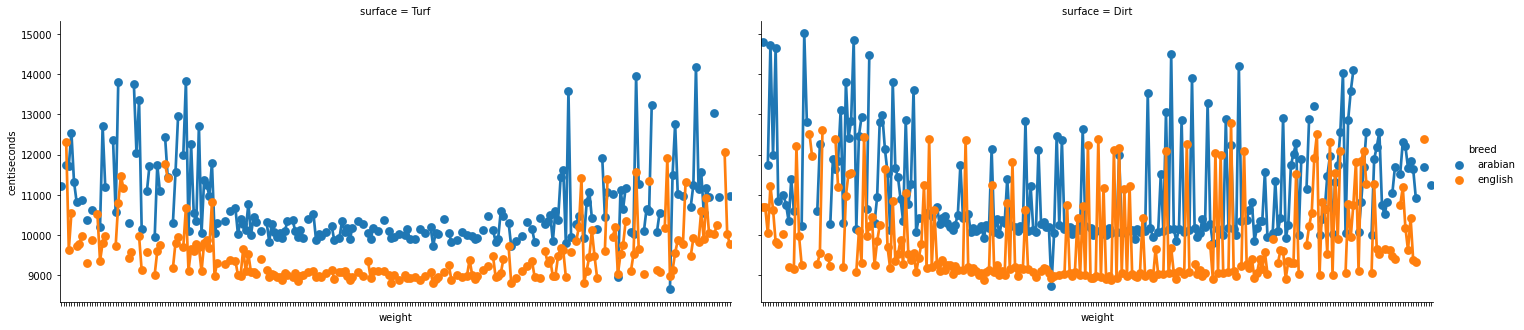

In [71]:
sns.catplot("weight", "centiseconds", col="surface", hue = "breed" , data=df_weight_middle_min, kind="point" ,aspect= 2, ci=None).set(xticklabels=[])

#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("tjk_data_plot_middle_weight_min.jpg" , dpi=300)

In [61]:
df_weight_long_min = df_weight_min[df_weight_min["distance"]=="long"]

c:\users\cagat\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


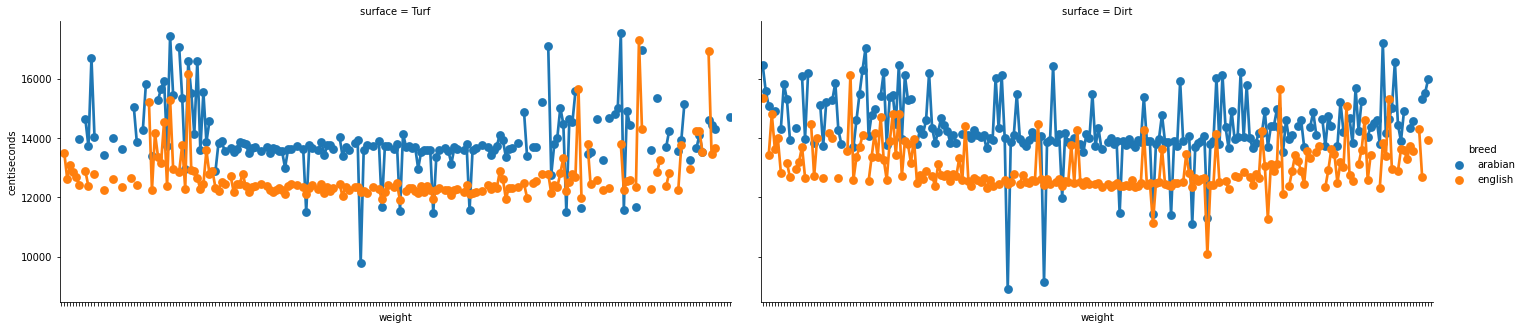

In [72]:
sns.catplot("weight", "centiseconds", col="surface", hue = "breed" , data=df_weight_long_min, kind="point" ,aspect= 2, ci=None).set(xticklabels=[])

#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig("tjk_data_plot_long_weight_min.jpg" , dpi=300)